#### Import packages

In [1]:
# load libraries

# data manipulation
library(dplyr)
library(tidyverse)

# machine learning
library(caret)
library(PerformanceAnalytics) # evaluation
library(ModelMetrics)
library(pROC)

library(rpart) # decision tree
library(rpart.plot)
library(party) # random forest and svm
library(xgboost) # xgboost
library(e1071) # svm

# visualization
library(ggplot2)
library(GGally)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v readr   1.3.1
v tibble  3.1.1     v purrr   0.3.2
v tidyr   1.1.3     v stringr 1.4.0
v ggplot2 3.3.5     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

In [ ]:
library(MASS) # feature importance; don't use select function from dplyr when you have it loaded

#### Import data

In [23]:
# Importing the dataset
student_grades = read.csv('student_grades.csv')
head(student_grades)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Pass
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0
GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,1


#### Checking the dataset

In [24]:
str(student_grades)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [25]:
summary(student_grades)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [5]:
# check for missing data
sum(is.na(student_grades))
# distinct, duplicate data
sum(duplicated(student_grades))

[1] 0

[1] 0

#### Data preparation

We just delete absences greater than 35 and all the outliers in the age feature.

In [26]:
# removing outliers in absences
student_grades <- student_grades %>%
subset(absences < 35)

In [27]:
dim(student_grades)

[1] 390  31

In [28]:
str(student_grades)

'data.frame':	390 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

#### machine learning

In [29]:
model_dataset <- student_grades %>%
select('age', 'absences', 'failures', 'sex', 'Fedu', 'Mjob', 'studytime', 'goout', 'Walc', 'Dalc', 'address', 'freetime',
       'famrel', 'traveltime', 'schoolsup', 'activities', 'paid', 'health', 'famsize', 'school', 'Pass')

In [30]:
model_dataset

,age,absences,failures,sex,Fedu,Mjob,studytime,goout,Walc,Dalc,...,freetime,famrel,traveltime,schoolsup,activities,paid,health,famsize,school,Pass
1,18,6,0,F,4,at_home,2,4,1,1,...,3,4,2,yes,no,no,3,GT3,GP,0
2,17,4,0,F,1,at_home,2,3,1,1,...,3,5,1,no,no,no,3,GT3,GP,0
3,15,10,3,F,1,at_home,2,2,3,2,...,3,4,1,yes,no,yes,3,LE3,GP,0
4,15,2,0,F,2,health,3,2,1,1,...,2,3,1,no,yes,yes,5,GT3,GP,1
5,16,4,0,F,3,other,2,2,2,1,...,3,4,1,no,no,yes,5,GT3,GP,0
6,16,10,0,M,3,services,2,2,2,1,...,4,5,1,no,yes,yes,5,LE3,GP,1
7,16,0,0,M,2,other,2,4,1,1,...,4,4,1,no,no,no,3,LE3,GP,1
8,17,6,0,F,4,other,2,4,1,1,...,1,4,2,yes,no,no,1,GT3,GP,0
9,15,0,0,M,2,services,2,2,1,1,...,2,4,1,no,no,yes,1,LE3,GP,1
10,15,0,0,M,4,other,2,1,1,1,...,5,5,1,no,yes,yes,5,GT3,GP,1


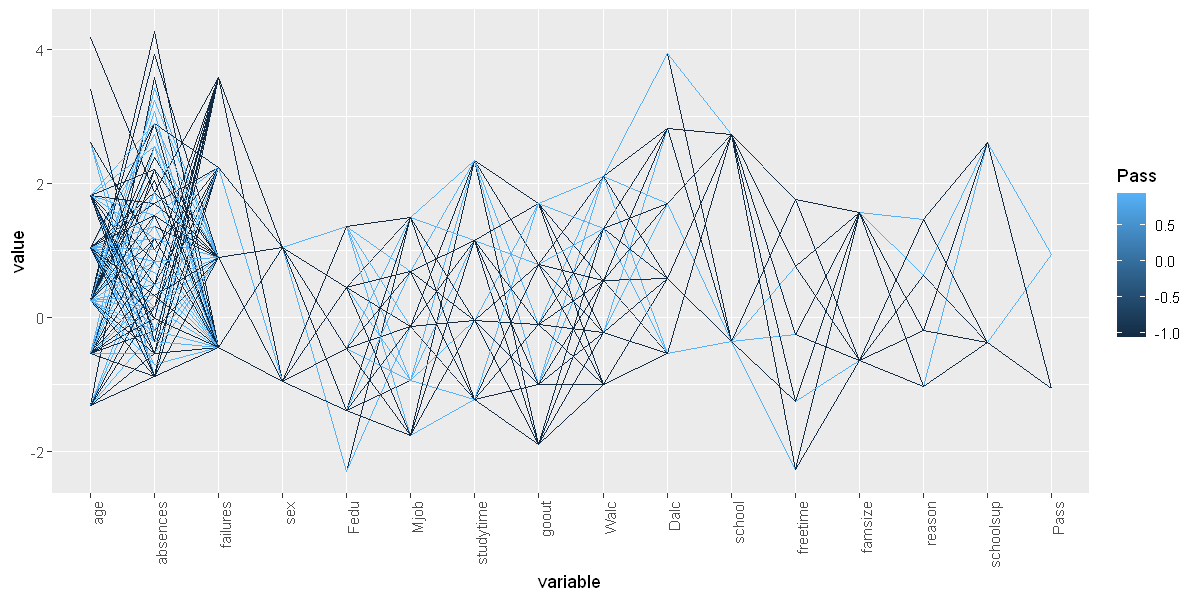

In [310]:
# VISUALIZE class seperation
options(repr.plot.width=10, repr.plot.height=5)
ggparcoord(model_dataset, columns = c(1:16), groupColumn = 16) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [31]:
str(model_dataset)

'data.frame':	390 obs. of  21 variables:
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ activities: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ paid      : Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 1 2 2 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 

In [32]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'school', 'famsize', 'activities', 'schoolsup', 'address',
                                                 'paid')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,school.GP,school.MS,famsize.GT3,famsize.LE3,activities.no,activities.yes,schoolsup.no,schoolsup.yes,address.R,address.U,paid.no,paid.yes
1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
3,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1
4,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1
5,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
6,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1
7,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0
8,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0
9,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1
10,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1


In [33]:
drops <- c('sex', 'Mjob', 'school', 'famsize', 'activities', 'schoolsup', 'address', 'paid')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,age,absences,failures,Fedu,studytime,goout,Walc,Dalc,freetime,famrel,traveltime,health,Pass
1,18,6,0,4,2,4,1,1,3,4,2,3,0
2,17,4,0,1,2,3,1,1,3,5,1,3,0
3,15,10,3,1,2,2,3,2,3,4,1,3,0
4,15,2,0,2,3,2,1,1,2,3,1,5,1
5,16,4,0,3,2,2,2,1,3,4,1,5,0
6,16,10,0,3,2,2,2,1,4,5,1,5,1
7,16,0,0,2,2,4,1,1,4,4,1,3,1
8,17,6,0,4,2,4,1,1,1,4,2,1,0
9,15,0,0,2,2,2,1,1,2,4,1,1,1
10,15,0,0,4,2,1,1,1,5,5,1,5,1


'data.frame':	390 obs. of  13 variables:
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [34]:
str(model_dataset)

'data.frame':	390 obs. of  13 variables:
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ health    : num  3 3 3 5 5 5 3 1 1 5 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [35]:
scale_dataset <- model_dataset[, -13]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,school.GP,school.MS,famsize.GT3,...,Fedu,studytime,goout,Walc,Dalc,freetime,famrel,traveltime,health,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,1,...,0.13333333,0.06666667,0.13333333,0.03333333,0.03333333,0.10000000,0.13333333,0.06666667,0.10000000,0
2,1,0,1,0,0,0,0,1,0,1,...,0.03333333,0.06666667,0.10000000,0.03333333,0.03333333,0.10000000,0.16666667,0.03333333,0.10000000,0
3,1,0,1,0,0,0,0,1,0,0,...,0.03333333,0.06666667,0.06666667,0.10000000,0.06666667,0.10000000,0.13333333,0.03333333,0.10000000,0
4,1,0,0,1,0,0,0,1,0,1,...,0.06666667,0.10000000,0.06666667,0.03333333,0.03333333,0.06666667,0.10000000,0.03333333,0.16666667,1
5,1,0,0,0,1,0,0,1,0,1,...,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0.10000000,0.13333333,0.03333333,0.16666667,0
6,0,1,0,0,0,1,0,1,0,0,...,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0.13333333,0.16666667,0.03333333,0.16666667,1
7,0,1,0,0,1,0,0,1,0,0,...,0.06666667,0.06666667,0.13333333,0.03333333,0.03333333,0.13333333,0.13333333,0.03333333,0.10000000,1
8,1,0,0,0,1,0,0,1,0,1,...,0.13333333,0.06666667,0.13333333,0.03333333,0.03333333,0.03333333,0.13333333,0.06666667,0.03333333,0
9,0,1,0,0,0,1,0,1,0,0,...,0.06666667,0.06666667,0.06666667,0.03333333,0.03333333,0.06666667,0.13333333,0.03333333,0.03333333,1
10,0,1,0,0,1,0,0,1,0,1,...,0.13333333,0.06666667,0.03333333,0.03333333,0.03333333,0.16666667,0.16666667,0.03333333,0.16666667,1


In [36]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [37]:
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,school.GP,school.MS,famsize.GT3,...,Fedu,studytime,goout,Walc,Dalc,freetime,famrel,traveltime,health,Pass
1,1,0,1,0,0,0,0,1,0,1,...,0.13333333,0.06666667,0.13333333,0.03333333,0.03333333,0.10000000,0.13333333,0.06666667,0.10000000,0
2,1,0,1,0,0,0,0,1,0,1,...,0.03333333,0.06666667,0.10000000,0.03333333,0.03333333,0.10000000,0.16666667,0.03333333,0.10000000,0
3,1,0,1,0,0,0,0,1,0,0,...,0.03333333,0.06666667,0.06666667,0.10000000,0.06666667,0.10000000,0.13333333,0.03333333,0.10000000,0
4,1,0,0,1,0,0,0,1,0,1,...,0.06666667,0.10000000,0.06666667,0.03333333,0.03333333,0.06666667,0.10000000,0.03333333,0.16666667,1
5,1,0,0,0,1,0,0,1,0,1,...,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0.10000000,0.13333333,0.03333333,0.16666667,0
6,0,1,0,0,0,1,0,1,0,0,...,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0.13333333,0.16666667,0.03333333,0.16666667,1
7,0,1,0,0,1,0,0,1,0,0,...,0.06666667,0.06666667,0.13333333,0.03333333,0.03333333,0.13333333,0.13333333,0.03333333,0.10000000,1
8,1,0,0,0,1,0,0,1,0,1,...,0.13333333,0.06666667,0.13333333,0.03333333,0.03333333,0.03333333,0.13333333,0.06666667,0.03333333,0
9,0,1,0,0,0,1,0,1,0,0,...,0.06666667,0.06666667,0.06666667,0.03333333,0.03333333,0.06666667,0.13333333,0.03333333,0.03333333,1
10,0,1,0,0,1,0,0,1,0,1,...,0.13333333,0.06666667,0.03333333,0.03333333,0.03333333,0.16666667,0.16666667,0.03333333,0.16666667,1


In [38]:
str(model_dataset)

'data.frame':	390 obs. of  32 variables:
 $ sex.F         : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M         : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other    : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ school.GP     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ famsize.GT3   : num  1 1 0 1 1 0 0 1 0 1 ...
 $ famsize.LE3   : num  0 0 1 0 0 1 1 0 1 0 ...
 $ activities.no : num  1 1 1 0 1 0 1 1 1 0 ...
 $ activities.yes: num  0 0 0 1 0 1 0 0 0 1 ...
 $ schoolsup.no  : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes : num  1 0 1 0 0 0 0 1 0 0 ...
 $ address.R     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.U     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ paid.no       : num  1 1 0 0 0 0 1 1 0 0 ...
 $ paid.yes      : num  0 0 1 1 1 1 0 0 1 1 ...
 $ age           : num  0.6 0.567 0.5 0.5 0.533

In [39]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-33]
testset <- testset[-33]

In [40]:
dim(trainset)
dim(testset)

[1] 312  32

[1] 78 32

#### fit the models and predict

In [21]:
library(caret)
library(ModelMetrics)
library(pROC)

In [28]:
library(tibble)

[1] 73.39744

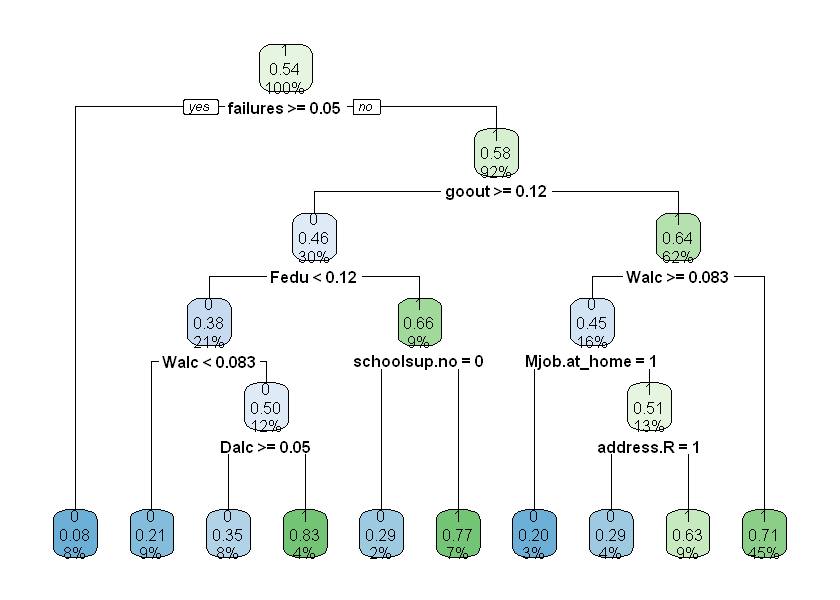

In [41]:
library(rpart)
library(rpart.plot)

options(repr.plot.width=7, repr.plot.height=5)
dtreemodel <- rpart(Pass~., data = trainset, method = 'class')
rpart.plot(dtreemodel, extra = 106)

# predict on trainset
tree_pred <- predict(dtreemodel, newdata = trainset, type = "class")
mean(tree_pred==trainset$Pass)*100

#predict on testset
tree_pred <- predict(dtreemodel, newdata = testset, type = "class")

In [42]:
conf_matrix <- table(actual = testset$Pass,predicted = tree_pred)
print(conf_matrix)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(sensitivity)
print(specificity)
print(mcc)
mean(tree_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = tree_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 20 20
     1  7 31
[1] 0.5
[1] 0.8157895
[1] 0.3317817


[1] 65.38462

[1] 0.6551724

In [43]:
imp <- varImp(dtreemodel)

In [44]:
str(imp)

'data.frame':	31 obs. of  1 variable:
 $ Overall: num  6.56 4.37 3.26 8.23 11.59 ...


In [45]:
# attach days as a column. This is presently the rownames
imp <- varImp(dtreemodel)
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')


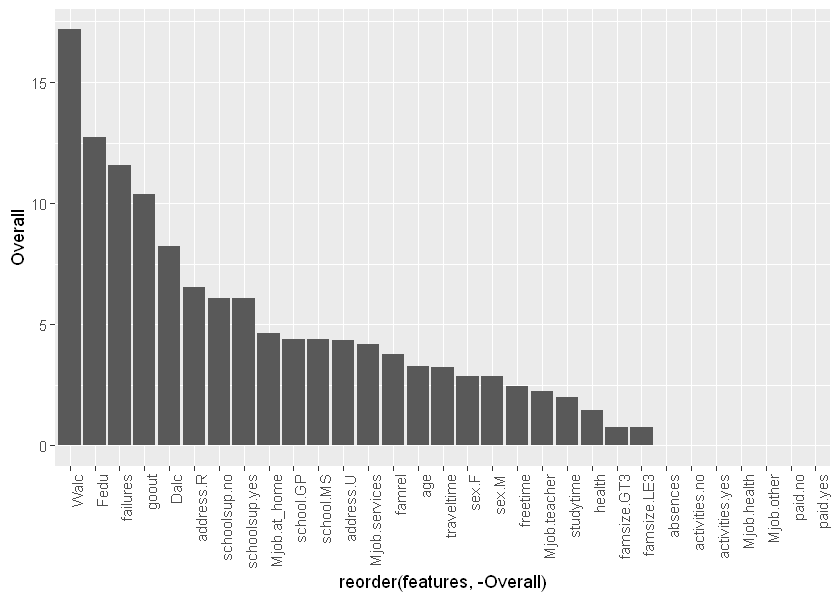

In [46]:
# use re-order on the x axis, using code found here: https://stackoverflow.com/questions/59461616/order-columns-in-ggplot
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [ ]:
# remove paid, activities, absences and famsize and fit the model again - exactly the same result is gotten;
# remove studytime, health, freetime
# remove sex and Mjob

In [93]:
model_dataset <- student_grades %>%
select('age', 'failures', 'Fedu', 'goout', 'Walc', 'Dalc', 'address', 'famrel', 'traveltime', 'schoolsup',  
       'school', 'studytime', 'health', 'freetime', 'sex', 'Mjob', 'Pass')

In [94]:
model_dataset

,age,failures,Fedu,goout,Walc,Dalc,address,famrel,traveltime,schoolsup,school,studytime,health,freetime,sex,Mjob,Pass
1,18,0,4,4,1,1,U,4,2,yes,GP,2,3,3,F,at_home,0
2,17,0,1,3,1,1,U,5,1,no,GP,2,3,3,F,at_home,0
3,15,3,1,2,3,2,U,4,1,yes,GP,2,3,3,F,at_home,0
4,15,0,2,2,1,1,U,3,1,no,GP,3,5,2,F,health,1
5,16,0,3,2,2,1,U,4,1,no,GP,2,5,3,F,other,0
6,16,0,3,2,2,1,U,5,1,no,GP,2,5,4,M,services,1
7,16,0,2,4,1,1,U,4,1,no,GP,2,3,4,M,other,1
8,17,0,4,4,1,1,U,4,2,yes,GP,2,1,1,F,other,0
9,15,0,2,2,1,1,U,4,1,no,GP,2,1,2,M,services,1
10,15,0,4,1,1,1,U,5,1,no,GP,2,5,5,M,other,1


In [95]:
str(model_dataset)

'data.frame':	390 obs. of  17 variables:
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [96]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c( 'school', 'address', 'schoolsup', 'sex', 'Mjob')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,school.GP,school.MS,address.R,address.U,schoolsup.no,schoolsup.yes,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher
1,1,0,0,1,0,1,1,0,1,0,0,0,0
2,1,0,0,1,1,0,1,0,1,0,0,0,0
3,1,0,0,1,0,1,1,0,1,0,0,0,0
4,1,0,0,1,1,0,1,0,0,1,0,0,0
5,1,0,0,1,1,0,1,0,0,0,1,0,0
6,1,0,0,1,1,0,0,1,0,0,0,1,0
7,1,0,0,1,1,0,0,1,0,0,1,0,0
8,1,0,0,1,0,1,1,0,0,0,1,0,0
9,1,0,0,1,1,0,0,1,0,0,0,1,0
10,1,0,0,1,1,0,0,1,0,0,1,0,0


In [97]:
drops <- c( 'school', 'address', 'schoolsup', 'sex', 'Mjob') # drop these original columns
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric)) # convert all columns to numeric

,age,failures,Fedu,goout,Walc,Dalc,famrel,traveltime,studytime,health,freetime,Pass
1,18,0,4,4,1,1,4,2,2,3,3,0
2,17,0,1,3,1,1,5,1,2,3,3,0
3,15,3,1,2,3,2,4,1,2,3,3,0
4,15,0,2,2,1,1,3,1,3,5,2,1
5,16,0,3,2,2,1,4,1,2,5,3,0
6,16,0,3,2,2,1,5,1,2,5,4,1
7,16,0,2,4,1,1,4,1,2,3,4,1
8,17,0,4,4,1,1,4,2,2,1,1,0
9,15,0,2,2,1,1,4,1,2,1,2,1
10,15,0,4,1,1,1,5,1,2,5,5,1


'data.frame':	390 obs. of  12 variables:
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [98]:
str(model_dataset)

'data.frame':	390 obs. of  12 variables:
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ health    : num  3 3 3 5 5 5 3 1 1 5 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [99]:
scale_dataset <- model_dataset[, -12] # scale everycolumn except Pass which is already within 0 and 1
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,school.GP,school.MS,address.R,address.U,schoolsup.no,schoolsup.yes,sex.F,sex.M,Mjob.at_home,Mjob.health,...,Fedu,goout,Walc,Dalc,famrel,traveltime,studytime,health,freetime,model_dataset$Pass
1,1,0,0,1,0,1,1,0,1,0,...,0.18181818,0.18181818,0.04545455,0.04545455,0.18181818,0.09090909,0.09090909,0.13636364,0.13636364,0
2,1,0,0,1,1,0,1,0,1,0,...,0.04545455,0.13636364,0.04545455,0.04545455,0.22727273,0.04545455,0.09090909,0.13636364,0.13636364,0
3,1,0,0,1,0,1,1,0,1,0,...,0.04545455,0.09090909,0.13636364,0.09090909,0.18181818,0.04545455,0.09090909,0.13636364,0.13636364,0
4,1,0,0,1,1,0,1,0,0,1,...,0.09090909,0.09090909,0.04545455,0.04545455,0.13636364,0.04545455,0.13636364,0.22727273,0.09090909,1
5,1,0,0,1,1,0,1,0,0,0,...,0.13636364,0.09090909,0.09090909,0.04545455,0.18181818,0.04545455,0.09090909,0.22727273,0.13636364,0
6,1,0,0,1,1,0,0,1,0,0,...,0.13636364,0.09090909,0.09090909,0.04545455,0.22727273,0.04545455,0.09090909,0.22727273,0.18181818,1
7,1,0,0,1,1,0,0,1,0,0,...,0.09090909,0.18181818,0.04545455,0.04545455,0.18181818,0.04545455,0.09090909,0.13636364,0.18181818,1
8,1,0,0,1,0,1,1,0,0,0,...,0.18181818,0.18181818,0.04545455,0.04545455,0.18181818,0.09090909,0.09090909,0.04545455,0.04545455,0
9,1,0,0,1,1,0,0,1,0,0,...,0.09090909,0.09090909,0.04545455,0.04545455,0.18181818,0.04545455,0.09090909,0.04545455,0.09090909,1
10,1,0,0,1,1,0,0,1,0,0,...,0.18181818,0.04545455,0.04545455,0.04545455,0.22727273,0.04545455,0.09090909,0.22727273,0.22727273,1


In [100]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [101]:
model_dataset

,school.GP,school.MS,address.R,address.U,schoolsup.no,schoolsup.yes,sex.F,sex.M,Mjob.at_home,Mjob.health,...,Fedu,goout,Walc,Dalc,famrel,traveltime,studytime,health,freetime,Pass
1,1,0,0,1,0,1,1,0,1,0,...,0.18181818,0.18181818,0.04545455,0.04545455,0.18181818,0.09090909,0.09090909,0.13636364,0.13636364,0
2,1,0,0,1,1,0,1,0,1,0,...,0.04545455,0.13636364,0.04545455,0.04545455,0.22727273,0.04545455,0.09090909,0.13636364,0.13636364,0
3,1,0,0,1,0,1,1,0,1,0,...,0.04545455,0.09090909,0.13636364,0.09090909,0.18181818,0.04545455,0.09090909,0.13636364,0.13636364,0
4,1,0,0,1,1,0,1,0,0,1,...,0.09090909,0.09090909,0.04545455,0.04545455,0.13636364,0.04545455,0.13636364,0.22727273,0.09090909,1
5,1,0,0,1,1,0,1,0,0,0,...,0.13636364,0.09090909,0.09090909,0.04545455,0.18181818,0.04545455,0.09090909,0.22727273,0.13636364,0
6,1,0,0,1,1,0,0,1,0,0,...,0.13636364,0.09090909,0.09090909,0.04545455,0.22727273,0.04545455,0.09090909,0.22727273,0.18181818,1
7,1,0,0,1,1,0,0,1,0,0,...,0.09090909,0.18181818,0.04545455,0.04545455,0.18181818,0.04545455,0.09090909,0.13636364,0.18181818,1
8,1,0,0,1,0,1,1,0,0,0,...,0.18181818,0.18181818,0.04545455,0.04545455,0.18181818,0.09090909,0.09090909,0.04545455,0.04545455,0
9,1,0,0,1,1,0,0,1,0,0,...,0.09090909,0.09090909,0.04545455,0.04545455,0.18181818,0.04545455,0.09090909,0.04545455,0.09090909,1
10,1,0,0,1,1,0,0,1,0,0,...,0.18181818,0.04545455,0.04545455,0.04545455,0.22727273,0.04545455,0.09090909,0.22727273,0.22727273,1


In [102]:
str(model_dataset)

'data.frame':	390 obs. of  25 variables:
 $ school.GP    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.R    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.U    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ age          : num  0.818 0.773 0.682 0.682 0.727 ...
 $ failures     : num  0 0 0.136 0 0 ...
 $ Fedu         : num  0.1818 0.0455 0.0455 0.0909 0.1364 ...
 $ goout        : num  0.1818 0.1364 0.0909 0.0909 0.0909 ...
 $ Walc         : num  0.0455 0.0455 0.1364 0.0455 0.0909 ...
 $ Dalc         : num  0.0455 0.0455 0.0909 0.0455 0.0455 ...
 $

In [103]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-26]
testset <- testset[-26]

In [104]:
dim(trainset)
dim(testset)

[1] 312  25

[1] 78 25

[1] 73.39744

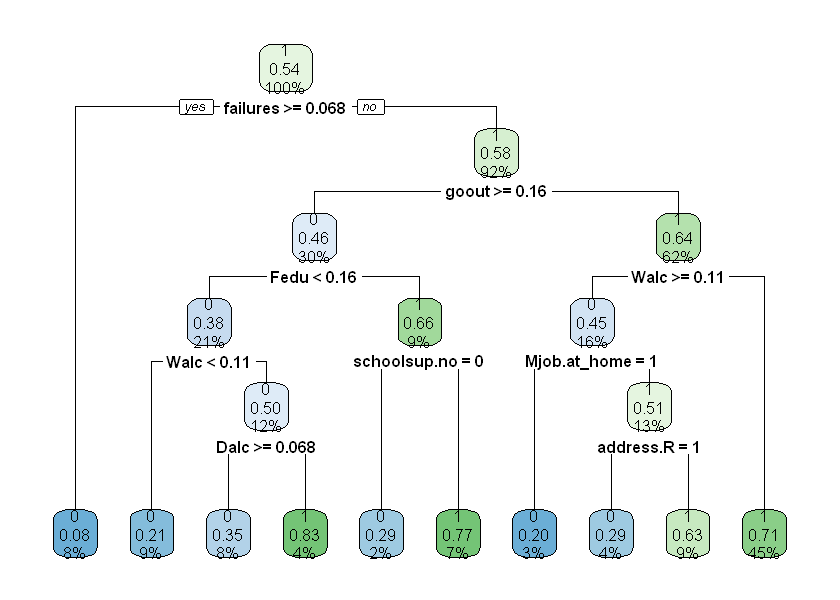

In [105]:
dtreemodel <- rpart(Pass~., data = trainset, method = 'class')
rpart.plot(dtreemodel, extra = 106)

# predict on trainset
tree_pred <- predict(dtreemodel, newdata = trainset, type = "class")
mean(tree_pred==trainset$Pass)*100

#predict on testset
tree_pred <- predict(dtreemodel, newdata = testset, type = "class")

In [106]:
conf_matrix <- table(actual = testset$Pass,predicted = tree_pred)
print(conf_matrix)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(sensitivity)
print(specificity)
print(mcc)
mean(tree_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = tree_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 20 20
     1  7 31
[1] 0.5
[1] 0.8157895
[1] 0.3317817


[1] 65.38462

[1] 0.6551724

In [107]:
imp <- varImp(dtreemodel)
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')


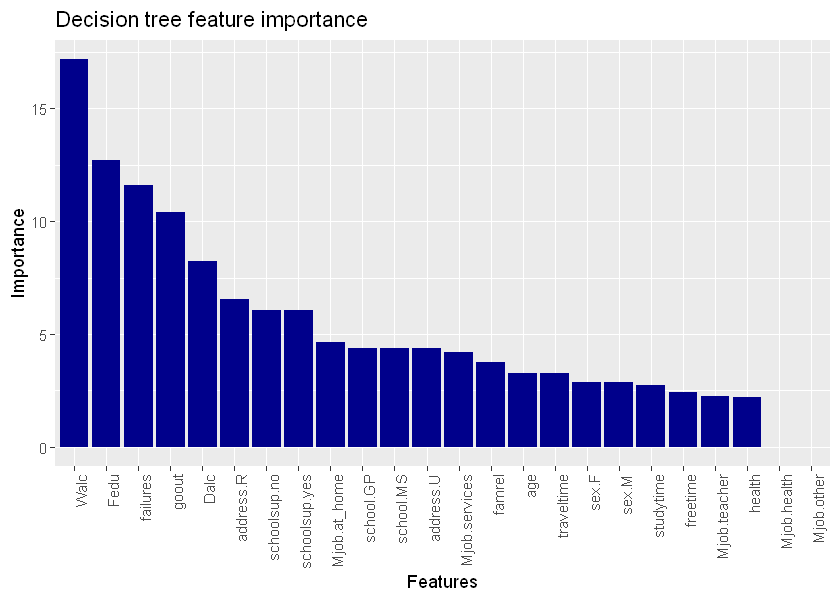

In [108]:
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col(fill = 'Dark blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') + ylab('Importance') +
labs(title = 'Decision tree feature importance')

In [ ]:
##Random forest

In [109]:
model_dataset <- student_grades %>%
select( 'absences', 'failures', 'sex',  'Mjob',  'goout', 'Walc', 'activities', 'school', 'romantic', 'traveltime', 'Medu',
       'reason', 'schoolsup', 'Dalc', 'Fedu', 'higher', 'guardian', 'address', 'Pstatus', 'Pass')

In [110]:
model_dataset

,absences,failures,sex,Mjob,goout,Walc,activities,school,romantic,traveltime,Medu,reason,schoolsup,Dalc,Fedu,higher,guardian,address,Pstatus,Pass
1,6,0,F,at_home,4,1,no,GP,no,2,4,course,yes,1,4,yes,mother,U,A,0
2,4,0,F,at_home,3,1,no,GP,no,1,1,course,no,1,1,yes,father,U,T,0
3,10,3,F,at_home,2,3,no,GP,no,1,1,other,yes,2,1,yes,mother,U,T,0
4,2,0,F,health,2,1,yes,GP,yes,1,4,home,no,1,2,yes,mother,U,T,1
5,4,0,F,other,2,2,no,GP,no,1,3,home,no,1,3,yes,father,U,T,0
6,10,0,M,services,2,2,yes,GP,no,1,4,reputation,no,1,3,yes,mother,U,T,1
7,0,0,M,other,4,1,no,GP,no,1,2,home,no,1,2,yes,mother,U,T,1
8,6,0,F,other,4,1,no,GP,no,2,4,home,yes,1,4,yes,mother,U,A,0
9,0,0,M,services,2,1,no,GP,no,1,3,home,no,1,2,yes,mother,U,A,1
10,0,0,M,other,1,1,yes,GP,no,1,3,home,no,1,4,yes,mother,U,T,1


In [111]:
str(model_dataset)

'data.frame':	390 obs. of  20 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ activities: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ romantic  : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ higher    : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ guardian  : Factor w/ 3 lev

In [113]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'activities', 'reason', 'school', 'romantic', 'schoolsup',
                                                  'higher', 'guardian', 'address', 'Pstatus')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,activities.no,activities.yes,reason.course,...,schoolsup.yes,higher.no,higher.yes,guardian.father,guardian.mother,guardian.other,address.R,address.U,Pstatus.A,Pstatus.T
1,1,0,1,0,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
2,1,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
3,1,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
4,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
6,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
7,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
8,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
9,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
10,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1


In [114]:
drops <- c('sex', 'Mjob', 'activities', 'reason', 'school', 'romantic', 'schoolsup',
                                                  'higher', 'guardian', 'address', 'Pstatus')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,absences,failures,goout,Walc,traveltime,Medu,Dalc,Fedu,Pass
1,6,0,4,1,2,4,1,4,0
2,4,0,3,1,1,1,1,1,0
3,10,3,2,3,1,1,2,1,0
4,2,0,2,1,1,4,1,2,1
5,4,0,2,2,1,3,1,3,0
6,10,0,2,2,1,4,1,3,1
7,0,0,4,1,1,2,1,2,1
8,6,0,4,1,2,4,1,4,0
9,0,0,2,1,1,3,1,2,1
10,0,0,1,1,1,3,1,4,1


'data.frame':	390 obs. of  9 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [115]:
str(model_dataset)

'data.frame':	390 obs. of  9 variables:
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [116]:
scale_dataset <- model_dataset[, -9]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,activities.no,activities.yes,reason.course,...,Pstatus.T,absences,failures,goout,Walc,traveltime,Medu,Dalc,Fedu,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,1,...,0,0.20000000,0.00000000,0.13333333,0.03333333,0.06666667,0.13333333,0.03333333,0.13333333,0
2,1,0,1,0,0,0,0,1,0,1,...,1,0.13333333,0.00000000,0.10000000,0.03333333,0.03333333,0.03333333,0.03333333,0.03333333,0
3,1,0,1,0,0,0,0,1,0,0,...,1,0.33333333,0.10000000,0.06666667,0.10000000,0.03333333,0.03333333,0.06666667,0.03333333,0
4,1,0,0,1,0,0,0,0,1,0,...,1,0.06666667,0.00000000,0.06666667,0.03333333,0.03333333,0.13333333,0.03333333,0.06666667,1
5,1,0,0,0,1,0,0,1,0,0,...,1,0.13333333,0.00000000,0.06666667,0.06666667,0.03333333,0.10000000,0.03333333,0.10000000,0
6,0,1,0,0,0,1,0,0,1,0,...,1,0.33333333,0.00000000,0.06666667,0.06666667,0.03333333,0.13333333,0.03333333,0.10000000,1
7,0,1,0,0,1,0,0,1,0,0,...,1,0.00000000,0.00000000,0.13333333,0.03333333,0.03333333,0.06666667,0.03333333,0.06666667,1
8,1,0,0,0,1,0,0,1,0,0,...,0,0.20000000,0.00000000,0.13333333,0.03333333,0.06666667,0.13333333,0.03333333,0.13333333,0
9,0,1,0,0,0,1,0,1,0,0,...,0,0.00000000,0.00000000,0.06666667,0.03333333,0.03333333,0.10000000,0.03333333,0.06666667,1
10,0,1,0,0,1,0,0,0,1,0,...,1,0.00000000,0.00000000,0.03333333,0.03333333,0.03333333,0.10000000,0.03333333,0.13333333,1


In [117]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [118]:
str(model_dataset)

'data.frame':	390 obs. of  37 variables:
 $ sex.F            : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M            : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other       : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services    : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ activities.no    : num  1 1 1 0 1 0 1 1 1 0 ...
 $ activities.yes   : num  0 0 0 1 0 1 0 0 0 1 ...
 $ reason.course    : num  1 1 0 0 0 0 0 0 0 0 ...
 $ reason.home      : num  0 0 0 1 1 0 1 1 1 1 ...
 $ reason.other     : num  0 0 1 0 0 0 0 0 0 0 ...
 $ reason.reputation: num  0 0 0 0 0 1 0 0 0 0 ...
 $ school.GP        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ romantic.no      : num  1 1 1 0 1 1 1 1 1 1 ...
 $ romantic.yes     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ schoolsup.no     : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes    : num  1 0 1 0 0 0 0 

In [119]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-38]
testset <- testset[-38]

In [120]:
dim(trainset)
dim(testset)

[1] 312  37

[1] 78 37

In [126]:
# Random forest model
library(party)
forest_model<- cforest(Pass~., data = trainset, control = cforest_unbiased(mtry = 30, ntree = 50))

# predict on trainset
rf_prob <- predict(forest_model, newdata = trainset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)
mean(rf_pred==trainset$Pass)

rf_prob <- predict(forest_model, newdata = testset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)


[1] 0.8173077

In [127]:
conf_matrix <- table(actual = testset$Pass, predicted = rf_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(rf_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = rf_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 23 17
     1  9 29
[1] 0.575
[1] 0.7631579
[1] 0.3436271


[1] 66.66667

[1] 0.6904762

In [123]:
imp <- varImp(forest_model)

In [124]:
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')

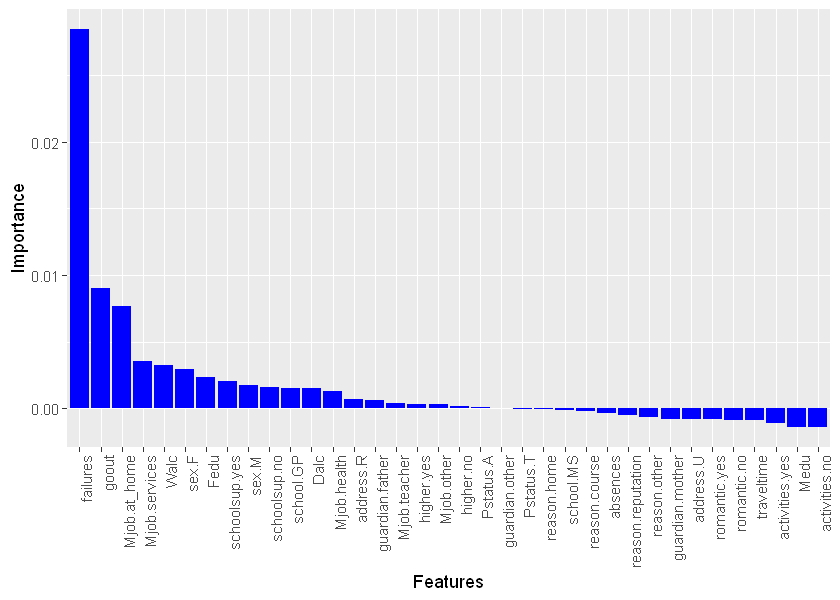

In [125]:
# use re-order on the x axis
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') +
ylab('Importance')

In [ ]:
# remove Pstatus, higher, guardian, reason, absences, address

# then remove romantic, activities

In [150]:
model_dataset <- student_grades %>%
select( 'failures', 'sex',  'Mjob',  'goout', 'Walc',  'school', 'traveltime', 'Medu',
       'schoolsup', 'Dalc', 'Fedu',  'Pass')

In [151]:
model_dataset

,failures,sex,Mjob,goout,Walc,school,traveltime,Medu,schoolsup,Dalc,Fedu,Pass
1,0,F,at_home,4,1,GP,2,4,yes,1,4,0
2,0,F,at_home,3,1,GP,1,1,no,1,1,0
3,3,F,at_home,2,3,GP,1,1,yes,2,1,0
4,0,F,health,2,1,GP,1,4,no,1,2,1
5,0,F,other,2,2,GP,1,3,no,1,3,0
6,0,M,services,2,2,GP,1,4,no,1,3,1
7,0,M,other,4,1,GP,1,2,no,1,2,1
8,0,F,other,4,1,GP,2,4,yes,1,4,0
9,0,M,services,2,1,GP,1,3,no,1,2,1
10,0,M,other,1,1,GP,1,3,no,1,4,1


In [152]:
str(model_dataset)

'data.frame':	390 obs. of  12 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [154]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'school', 'schoolsup')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,school.GP,school.MS,schoolsup.no,schoolsup.yes
1,1,0,1,0,0,0,0,1,0,0,1
2,1,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,1,0,1,0
5,1,0,0,0,1,0,0,1,0,1,0
6,0,1,0,0,0,1,0,1,0,1,0
7,0,1,0,0,1,0,0,1,0,1,0
8,1,0,0,0,1,0,0,1,0,0,1
9,0,1,0,0,0,1,0,1,0,1,0
10,0,1,0,0,1,0,0,1,0,1,0


In [155]:
drops <- c('sex', 'Mjob', 'school', 'schoolsup')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Walc,traveltime,Medu,Dalc,Fedu,Pass
1,0,4,1,2,4,1,4,0
2,0,3,1,1,1,1,1,0
3,3,2,3,1,1,2,1,0
4,0,2,1,1,4,1,2,1
5,0,2,2,1,3,1,3,0
6,0,2,2,1,4,1,3,1
7,0,4,1,1,2,1,2,1
8,0,4,1,2,4,1,4,0
9,0,2,1,1,3,1,2,1
10,0,1,1,1,3,1,4,1


'data.frame':	390 obs. of  8 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [156]:
str(model_dataset)

'data.frame':	390 obs. of  8 variables:
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [157]:
scale_dataset <- model_dataset[, -8]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,school.GP,school.MS,schoolsup.no,schoolsup.yes,failures,goout,Walc,traveltime,Medu,Dalc,Fedu,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,0,1,0.0,0.8,0.2,0.4,0.8,0.2,0.8,0
2,1,0,1,0,0,0,0,1,0,1,0,0.0,0.6,0.2,0.2,0.2,0.2,0.2,0
3,1,0,1,0,0,0,0,1,0,0,1,0.6,0.4,0.6,0.2,0.2,0.4,0.2,0
4,1,0,0,1,0,0,0,1,0,1,0,0.0,0.4,0.2,0.2,0.8,0.2,0.4,1
5,1,0,0,0,1,0,0,1,0,1,0,0.0,0.4,0.4,0.2,0.6,0.2,0.6,0
6,0,1,0,0,0,1,0,1,0,1,0,0.0,0.4,0.4,0.2,0.8,0.2,0.6,1
7,0,1,0,0,1,0,0,1,0,1,0,0.0,0.8,0.2,0.2,0.4,0.2,0.4,1
8,1,0,0,0,1,0,0,1,0,0,1,0.0,0.8,0.2,0.4,0.8,0.2,0.8,0
9,0,1,0,0,0,1,0,1,0,1,0,0.0,0.4,0.2,0.2,0.6,0.2,0.4,1
10,0,1,0,0,1,0,0,1,0,1,0,0.0,0.2,0.2,0.2,0.6,0.2,0.8,1


In [158]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [159]:
str(model_dataset)

'data.frame':	390 obs. of  19 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ school.GP    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ school.MS    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ failures     : num  0 0 0.6 0 0 0 0 0 0 0 ...
 $ goout        : num  0.8 0.6 0.4 0.4 0.4 0.4 0.8 0.8 0.4 0.2 ...
 $ Walc         : num  0.2 0.2 0.6 0.2 0.4 0.4 0.2 0.2 0.2 0.2 ...
 $ traveltime   : num  0.4 0.2 0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.2 ...
 $ Medu         : num  0.8 0.2 0.2 0.8 0.6 0.8 0.4 0.8 0.6 0.6 ...
 $ Dalc         : num  0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ Fedu         : num  0.8 0.2 0.2 0.4 0.6 0.6 0.4 0.8 0.4

In [160]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-20]
testset <- testset[-20]

In [161]:
dim(trainset)
dim(testset)

[1] 312  19

[1] 78 19

In [169]:
# Random forest model
library(party)
forest_model<- cforest(Pass~., data = trainset, control = cforest_unbiased(mtry = 15, ntree = 30))

# predict on trainset
rf_prob <- predict(forest_model, newdata = trainset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)
mean(rf_pred==trainset$Pass)

rf_prob <- predict(forest_model, newdata = testset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)


[1] 0.7980769

In [170]:
conf_matrix <- table(actual = testset$Pass, predicted = rf_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(rf_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = rf_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 23 17
     1  9 29
[1] 0.575
[1] 0.7631579
[1] 0.3436271


[1] 66.66667

[1] 0.6904762

In [164]:
imp <- varImp(forest_model)

In [165]:
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')

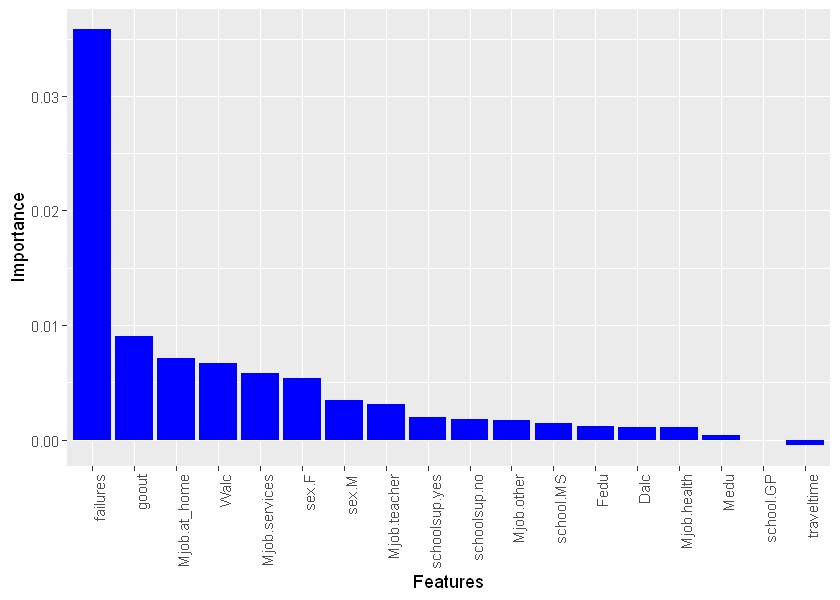

In [166]:
# use re-order on the x axis
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') +
ylab('Importance')

In [ ]:
# remove traveltime, Medu, school


In [215]:
model_dataset <- student_grades %>%
select( 'failures', 'sex',  'Mjob',  'goout', 'Walc', 'schoolsup', 'Dalc', 'Fedu',  'Pass')

In [216]:
head(model_dataset)

failures,sex,Mjob,goout,Walc,schoolsup,Dalc,Fedu,Pass
0,F,at_home,4,1,yes,1,4,0
0,F,at_home,3,1,no,1,1,0
3,F,at_home,2,3,yes,2,1,0
0,F,health,2,1,no,1,2,1
0,F,other,2,2,no,1,3,0
0,M,services,2,2,no,1,3,1


In [217]:
str(model_dataset)

'data.frame':	390 obs. of  9 variables:
 $ failures : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex      : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob     : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout    : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : int  1 1 3 1 2 2 1 1 1 1 ...
 $ schoolsup: Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ Dalc     : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu     : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass     : int  0 0 0 1 0 1 1 0 1 1 ...


In [218]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'schoolsup')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes
1,1,0,1,0,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0
5,1,0,0,0,1,0,0,1,0
6,0,1,0,0,0,1,0,1,0
7,0,1,0,0,1,0,0,1,0
8,1,0,0,0,1,0,0,0,1
9,0,1,0,0,0,1,0,1,0
10,0,1,0,0,1,0,0,1,0


In [219]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('Mjob', 'sex', 'schoolsup')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,sex.F,sex.M,schoolsup.no,schoolsup.yes
1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,1,0,0,1
4,0,1,0,0,0,1,0,1,0
5,0,0,1,0,0,1,0,1,0
6,0,0,0,1,0,0,1,1,0
7,0,0,1,0,0,0,1,1,0
8,0,0,1,0,0,1,0,0,1
9,0,0,0,1,0,0,1,1,0
10,0,0,1,0,0,0,1,1,0


In [220]:
drops <- c('Mjob', 'sex', 'schoolsup')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Walc,Dalc,Fedu,Pass
1,0,4,1,1,4,0
2,0,3,1,1,1,0
3,3,2,3,2,1,0
4,0,2,1,1,2,1
5,0,2,2,1,3,0
6,0,2,2,1,3,1
7,0,4,1,1,2,1
8,0,4,1,1,4,0
9,0,2,1,1,2,1
10,0,1,1,1,4,1


'data.frame':	390 obs. of  6 variables:
 $ failures: int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout   : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc    : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc    : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu    : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass    : int  0 0 0 1 0 1 1 0 1 1 ...


In [221]:
str(model_dataset)

'data.frame':	390 obs. of  6 variables:
 $ failures: num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout   : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc    : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Dalc    : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Fedu    : num  4 1 1 2 3 3 2 4 2 4 ...
 $ Pass    : num  0 0 0 1 0 1 1 0 1 1 ...


In [222]:
scale_dataset <- model_dataset[, -6]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,sex.F,sex.M,schoolsup.no,schoolsup.yes,failures,goout,Walc,Dalc,Fedu,model_dataset$Pass
1,1,0,0,0,0,1,0,0,1,0.0,0.8,0.2,0.2,0.8,0
2,1,0,0,0,0,1,0,1,0,0.0,0.6,0.2,0.2,0.2,0
3,1,0,0,0,0,1,0,0,1,0.6,0.4,0.6,0.4,0.2,0
4,0,1,0,0,0,1,0,1,0,0.0,0.4,0.2,0.2,0.4,1
5,0,0,1,0,0,1,0,1,0,0.0,0.4,0.4,0.2,0.6,0
6,0,0,0,1,0,0,1,1,0,0.0,0.4,0.4,0.2,0.6,1
7,0,0,1,0,0,0,1,1,0,0.0,0.8,0.2,0.2,0.4,1
8,0,0,1,0,0,1,0,0,1,0.0,0.8,0.2,0.2,0.8,0
9,0,0,0,1,0,0,1,1,0,0.0,0.4,0.2,0.2,0.4,1
10,0,0,1,0,0,0,1,1,0,0.0,0.2,0.2,0.2,0.8,1


In [223]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [224]:
str(model_dataset)

'data.frame':	390 obs. of  15 variables:
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ failures     : num  0 0 0.6 0 0 0 0 0 0 0 ...
 $ goout        : num  0.8 0.6 0.4 0.4 0.4 0.4 0.8 0.8 0.4 0.2 ...
 $ Walc         : num  0.2 0.2 0.6 0.2 0.4 0.4 0.2 0.2 0.2 0.2 ...
 $ Dalc         : num  0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ Fedu         : num  0.8 0.2 0.2 0.4 0.6 0.6 0.4 0.8 0.4 0.8 ...
 $ Pass         : num  0 0 0 1 0 1 1 0 1 1 ...


In [225]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-16]
testset <- testset[-16]

In [226]:
dim(trainset)
dim(testset)

[1] 312  15

[1] 78 15

In [227]:
# Random forest model
library(party)
forest_model<- cforest(Pass~., data = trainset, control = cforest_unbiased(mtry = 10, ntree = 20))

# predict on trainset
rf_prob <- predict(forest_model, newdata = trainset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)
mean(rf_pred==trainset$Pass)

rf_prob <- predict(forest_model, newdata = testset, type = "response")
rf_pred <- ifelse(rf_prob>0.5, 1, 0)


[1] 0.7820513

In [228]:
conf_matrix <- table(actual = testset$Pass, predicted = rf_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(rf_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = rf_pred, cutoff = 0.5)

      predicted
actual  0  1
     0 27 13
     1 11 27
[1] 0.675
[1] 0.7105263
[1] 0.3855263


[1] 69.23077

[1] 0.6923077

In [187]:
imp <- varImp(forest_model)

In [188]:
copy_imp <- imp
copy_imp$features <- row.names(copy_imp)
imp <- copy_imp
colnames(imp) <- c('Overall', 'features')

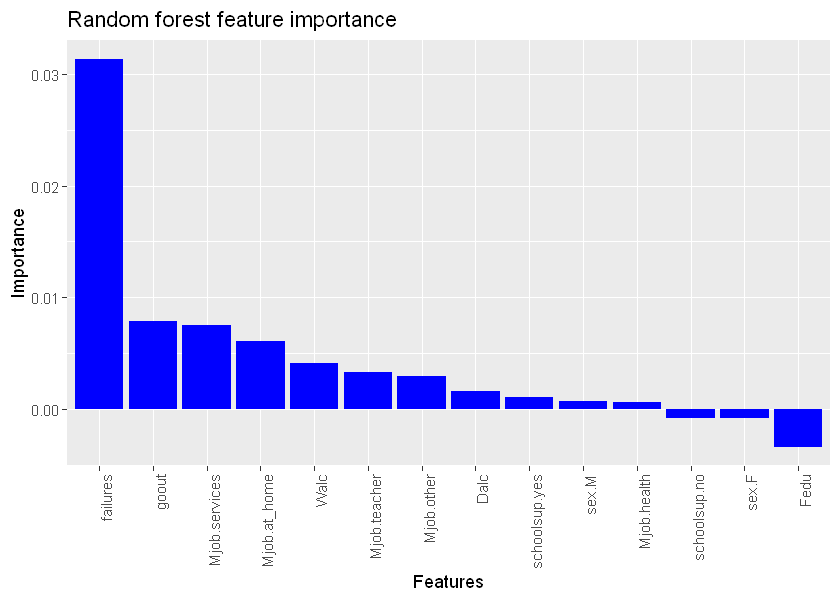

In [191]:
# use re-order on the x axis
ggplot(imp, aes(y = Overall, x = reorder(features, -Overall)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') +
ylab('Importance') +
labs(title = 'Random forest feature importance')

In [ ]:
# remove schoolsup also - yeilds a worse model ---stop

In [ ]:
# xgboost tuning

In [430]:
model_dataset <- student_grades %>%
select( 'absences', 'failures', 'sex',  'Mjob',  'goout', 'Walc', 'freetime', 'paid', 'Fedu', 'health', 'studytime', 
       'famsize', 'schoolsup','romantic', 'age', 'famrel', 'traveltime', 'Dalc', 'Pass')

In [431]:
model_dataset

,absences,failures,sex,Mjob,goout,Walc,freetime,paid,Fedu,health,studytime,famsize,schoolsup,romantic,age,famrel,traveltime,Dalc,Pass
1,6,0,F,at_home,4,1,3,no,4,3,2,GT3,yes,no,18,4,2,1,0
2,4,0,F,at_home,3,1,3,no,1,3,2,GT3,no,no,17,5,1,1,0
3,10,3,F,at_home,2,3,3,yes,1,3,2,LE3,yes,no,15,4,1,2,0
4,2,0,F,health,2,1,2,yes,2,5,3,GT3,no,yes,15,3,1,1,1
5,4,0,F,other,2,2,3,yes,3,5,2,GT3,no,no,16,4,1,1,0
6,10,0,M,services,2,2,4,yes,3,5,2,LE3,no,no,16,5,1,1,1
7,0,0,M,other,4,1,4,no,2,3,2,LE3,no,no,16,4,1,1,1
8,6,0,F,other,4,1,1,no,4,1,2,GT3,yes,no,17,4,2,1,0
9,0,0,M,services,2,1,2,yes,2,1,2,LE3,no,no,15,4,1,1,1
10,0,0,M,other,1,1,5,yes,4,5,2,GT3,no,no,15,5,1,1,1


In [432]:
str(model_dataset)

'data.frame':	390 obs. of  19 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ paid      : Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 1 2 2 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ romantic  : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 

In [433]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup', 'romantic')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,famsize.LE3,schoolsup.no,schoolsup.yes,romantic.no,romantic.yes
1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0
2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0
4,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1
5,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
6,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0
8,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0
9,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0
10,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0


In [434]:
drops <- c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup', 'romantic')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,absences,failures,goout,Walc,freetime,Fedu,health,studytime,age,famrel,traveltime,Dalc,Pass
1,6,0,4,1,3,4,3,2,18,4,2,1,0
2,4,0,3,1,3,1,3,2,17,5,1,1,0
3,10,3,2,3,3,1,3,2,15,4,1,2,0
4,2,0,2,1,2,2,5,3,15,3,1,1,1
5,4,0,2,2,3,3,5,2,16,4,1,1,0
6,10,0,2,2,4,3,5,2,16,5,1,1,1
7,0,0,4,1,4,2,3,2,16,4,1,1,1
8,6,0,4,1,1,4,1,2,17,4,2,1,0
9,0,0,2,1,2,2,1,2,15,4,1,1,1
10,0,0,1,1,5,4,5,2,15,5,1,1,1


'data.frame':	390 obs. of  13 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [435]:
str(model_dataset)

'data.frame':	390 obs. of  13 variables:
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : num  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [436]:
scale_dataset <- model_dataset[, -13]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,...,Walc,freetime,Fedu,health,studytime,age,famrel,traveltime,Dalc,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,1,...,0.03333333,0.10000000,0.13333333,0.10000000,0.06666667,0.6000000,0.13333333,0.06666667,0.03333333,0
2,1,0,1,0,0,0,0,1,0,1,...,0.03333333,0.10000000,0.03333333,0.10000000,0.06666667,0.5666667,0.16666667,0.03333333,0.03333333,0
3,1,0,1,0,0,0,0,0,1,0,...,0.10000000,0.10000000,0.03333333,0.10000000,0.06666667,0.5000000,0.13333333,0.03333333,0.06666667,0
4,1,0,0,1,0,0,0,0,1,1,...,0.03333333,0.06666667,0.06666667,0.16666667,0.10000000,0.5000000,0.10000000,0.03333333,0.03333333,1
5,1,0,0,0,1,0,0,0,1,1,...,0.06666667,0.10000000,0.10000000,0.16666667,0.06666667,0.5333333,0.13333333,0.03333333,0.03333333,0
6,0,1,0,0,0,1,0,0,1,0,...,0.06666667,0.13333333,0.10000000,0.16666667,0.06666667,0.5333333,0.16666667,0.03333333,0.03333333,1
7,0,1,0,0,1,0,0,1,0,0,...,0.03333333,0.13333333,0.06666667,0.10000000,0.06666667,0.5333333,0.13333333,0.03333333,0.03333333,1
8,1,0,0,0,1,0,0,1,0,1,...,0.03333333,0.03333333,0.13333333,0.03333333,0.06666667,0.5666667,0.13333333,0.06666667,0.03333333,0
9,0,1,0,0,0,1,0,0,1,0,...,0.03333333,0.06666667,0.06666667,0.03333333,0.06666667,0.5000000,0.13333333,0.03333333,0.03333333,1
10,0,1,0,0,1,0,0,0,1,1,...,0.03333333,0.16666667,0.13333333,0.16666667,0.06666667,0.5000000,0.16666667,0.03333333,0.03333333,1


In [437]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [438]:
str(model_dataset)

'data.frame':	390 obs. of  28 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ paid.no      : num  1 1 0 0 0 0 1 1 0 0 ...
 $ paid.yes     : num  0 0 1 1 1 1 0 0 1 1 ...
 $ famsize.GT3  : num  1 1 0 1 1 0 0 1 0 1 ...
 $ famsize.LE3  : num  0 0 1 0 0 1 1 0 1 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ romantic.no  : num  1 1 1 0 1 1 1 1 1 1 ...
 $ romantic.yes : num  0 0 0 1 0 0 0 0 0 0 ...
 $ absences     : num  0.2 0.1333 0.3333 0.0667 0.1333 ...
 $ failures     : num  0 0 0.1 0 0 0 0 0 0 0 ...
 $ goout        : num  0.1333 0.1 0.0667 0.0667 0.0667 ...
 $ Walc         : num  0.0333 0.0333 0.1 0.0333 0.0667 ...
 $ freetime     : num  0.1 0

In [439]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-29]
testset <- testset[-29]

In [440]:
dim(trainset)
dim(testset)

[1] 312  28

[1] 78 28

In [441]:
library(xgboost)
train_matrix <- model.matrix(Pass~., trainset)
test_matrix <- model.matrix(Pass~., testset) 

train_labels <- trainset$Pass 
train_labels

[1] 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 [38] 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 [75] 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0
[112] 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0
[149] 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
[186] 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
[223] 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
[260] 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
[297] 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0

In [445]:
# fitting xgboost model
xgbmodel <- xgboost(data = train_matrix, label = train_labels,
eta = 0.2, nrounds = 60, max_depth = 40, objective ="binary:logistic", verbose=0) 

# predict on train set
xgb_prob <- predict(xgbmodel, train_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 
mean(xgb_pred==trainset$Pass)

# predict on test set
xgb_prob <- predict(xgbmodel, test_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 

conf_matrix <- table(actual = testset$Pass, predicted = xgb_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(xgb_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = xgb_pred, cutoff = 0.5)

[12:35:46] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[1] 1

      predicted
actual  0  1
     0 31  9
     1 13 25
[1] 0.775
[1] 0.6578947
[1] 0.4363533


[1] 71.79487

[1] 0.6944444

tuning performance with these features
(30,20) 100, 66.67, 0.61, 0.72, 0.68, 0.34
(40,30) 100, 67.94, 0.63, 0.73, 0.68, 0.36
(50,30) 100, 67.95, 0.63, 0.73, 0.68, 0.36
(20,10) 100, 69.23, 0.59, 0.81, 0.40

Feature,Gain,Cover,Frequency
absences,0.11046634,0.12736096,0.12833453
failures,0.09977513,0.11195230,0.03100216
Walc,0.09087545,0.05438532,0.07858688
goout,0.08877867,0.07623466,0.06921413
age,0.06131053,0.04407312,0.07209805
Fedu,0.05727321,0.06503724,0.06416727


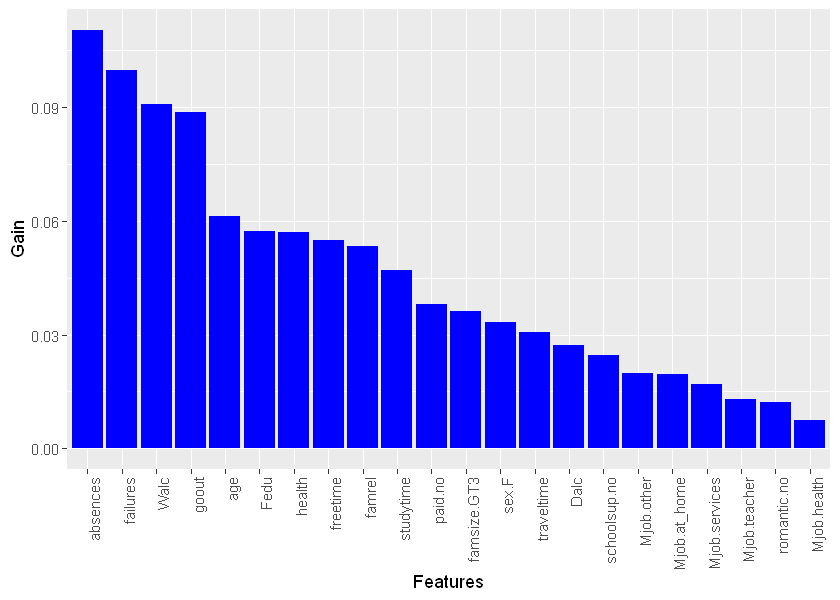

In [446]:
# get variable importance 
imp <- xgb.importance(model = xgbmodel)
imp <- as.data.frame(imp)

# inspect
head(imp)

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Gain, x = reorder(Feature, -Gain)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [447]:
# remove romantic, Dalc and fit the model again

In [555]:
model_dataset <- student_grades %>%
select( 'absences', 'failures', 'sex',  'Mjob',  'goout', 'Walc', 'freetime', 'paid', 'Fedu', 'health', 'studytime', 
       'famsize', 'schoolsup','traveltime', 'age', 'famrel', 'Pass')

In [556]:
head(model_dataset)

absences,failures,sex,Mjob,goout,Walc,freetime,paid,Fedu,health,studytime,famsize,schoolsup,traveltime,age,famrel,Pass
6,0,F,at_home,4,1,3,no,4,3,2,GT3,yes,2,18,4,0
4,0,F,at_home,3,1,3,no,1,3,2,GT3,no,1,17,5,0
10,3,F,at_home,2,3,3,yes,1,3,2,LE3,yes,1,15,4,0
2,0,F,health,2,1,2,yes,2,5,3,GT3,no,1,15,3,1
4,0,F,other,2,2,3,yes,3,5,2,GT3,no,1,16,4,0
10,0,M,services,2,2,4,yes,3,5,2,LE3,no,1,16,5,1


In [557]:
str(model_dataset)

'data.frame':	390 obs. of  17 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ paid      : Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 1 2 2 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [558]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
head(final_df)

sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,famsize.LE3,schoolsup.no,schoolsup.yes
1,0,1,0,0,0,0,1,0,1,0,0,1
1,0,1,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,1,0,1
1,0,0,1,0,0,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,1,0
0,1,0,0,0,1,0,0,1,0,1,1,0


In [559]:
drops <- c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,absences,failures,goout,Walc,freetime,Fedu,health,studytime,traveltime,age,famrel,Pass
1,6,0,4,1,3,4,3,2,2,18,4,0
2,4,0,3,1,3,1,3,2,1,17,5,0
3,10,3,2,3,3,1,3,2,1,15,4,0
4,2,0,2,1,2,2,5,3,1,15,3,1
5,4,0,2,2,3,3,5,2,1,16,4,0
6,10,0,2,2,4,3,5,2,1,16,5,1
7,0,0,4,1,4,2,3,2,1,16,4,1
8,6,0,4,1,1,4,1,2,2,17,4,0
9,0,0,2,1,2,2,1,2,1,15,4,1
10,0,0,1,1,5,4,5,2,1,15,5,1


'data.frame':	390 obs. of  12 variables:
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [560]:
str(model_dataset)

'data.frame':	390 obs. of  12 variables:
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ health    : num  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [561]:
scale_dataset <- model_dataset[, -12]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,...,goout,Walc,freetime,Fedu,health,studytime,traveltime,age,famrel,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,1,...,0.13333333,0.03333333,0.10000000,0.13333333,0.10000000,0.06666667,0.06666667,0.6000000,0.13333333,0
2,1,0,1,0,0,0,0,1,0,1,...,0.10000000,0.03333333,0.10000000,0.03333333,0.10000000,0.06666667,0.03333333,0.5666667,0.16666667,0
3,1,0,1,0,0,0,0,0,1,0,...,0.06666667,0.10000000,0.10000000,0.03333333,0.10000000,0.06666667,0.03333333,0.5000000,0.13333333,0
4,1,0,0,1,0,0,0,0,1,1,...,0.06666667,0.03333333,0.06666667,0.06666667,0.16666667,0.10000000,0.03333333,0.5000000,0.10000000,1
5,1,0,0,0,1,0,0,0,1,1,...,0.06666667,0.06666667,0.10000000,0.10000000,0.16666667,0.06666667,0.03333333,0.5333333,0.13333333,0
6,0,1,0,0,0,1,0,0,1,0,...,0.06666667,0.06666667,0.13333333,0.10000000,0.16666667,0.06666667,0.03333333,0.5333333,0.16666667,1
7,0,1,0,0,1,0,0,1,0,0,...,0.13333333,0.03333333,0.13333333,0.06666667,0.10000000,0.06666667,0.03333333,0.5333333,0.13333333,1
8,1,0,0,0,1,0,0,1,0,1,...,0.13333333,0.03333333,0.03333333,0.13333333,0.03333333,0.06666667,0.06666667,0.5666667,0.13333333,0
9,0,1,0,0,0,1,0,0,1,0,...,0.06666667,0.03333333,0.06666667,0.06666667,0.03333333,0.06666667,0.03333333,0.5000000,0.13333333,1
10,0,1,0,0,1,0,0,0,1,1,...,0.03333333,0.03333333,0.16666667,0.13333333,0.16666667,0.06666667,0.03333333,0.5000000,0.16666667,1


In [562]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [563]:
str(model_dataset)

'data.frame':	390 obs. of  25 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ paid.no      : num  1 1 0 0 0 0 1 1 0 0 ...
 $ paid.yes     : num  0 0 1 1 1 1 0 0 1 1 ...
 $ famsize.GT3  : num  1 1 0 1 1 0 0 1 0 1 ...
 $ famsize.LE3  : num  0 0 1 0 0 1 1 0 1 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ absences     : num  0.2 0.1333 0.3333 0.0667 0.1333 ...
 $ failures     : num  0 0 0.1 0 0 0 0 0 0 0 ...
 $ goout        : num  0.1333 0.1 0.0667 0.0667 0.0667 ...
 $ Walc         : num  0.0333 0.0333 0.1 0.0333 0.0667 ...
 $ freetime     : num  0.1 0.1 0.1 0.0667 0.1 ...
 $ Fedu         : num  0.1333 0.0333 0.0333 0.0667 0.1 ...
 $ health    

In [564]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-26]
testset <- testset[-26]

In [565]:
dim(trainset)
dim(testset)

[1] 312  25

[1] 78 25

In [566]:
train_matrix <- model.matrix(Pass~., trainset)
test_matrix <- model.matrix(Pass~., testset) 

train_labels <- trainset$Pass 
train_labels

[1] 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 [38] 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 [75] 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0
[112] 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0
[149] 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
[186] 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
[223] 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
[260] 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
[297] 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0

In [578]:
xgbmodel <- xgboost(data = train_matrix, label = train_labels,
eta = 0.5, nrounds = 15, max_depth = 25, objective ="binary:logistic", verbose=0) 

# predict on train set
xgb_prob <- predict(xgbmodel, train_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 
mean(xgb_pred==trainset$Pass)

# predict on test set
xgb_prob <- predict(xgbmodel, test_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 

conf_matrix <- table(actual = testset$Pass, predicted = xgb_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(xgb_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = xgb_pred, cutoff = 0.5)

[13:11:12] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[1] 1

      predicted
actual  0  1
     0 29 11
     1  9 29
[1] 0.725
[1] 0.7631579
[1] 0.4881579


[1] 74.35897

[1] 0.7435897

Feature,Gain,Cover,Frequency
absences,0.12499161,0.13425366,0.16791980
Walc,0.11014512,0.06955177,0.10526316
failures,0.10759658,0.12274789,0.02756892
goout,0.09561056,0.07307850,0.07518797
famrel,0.06218877,0.06067459,0.07769424
Fedu,0.05820247,0.07176436,0.07017544


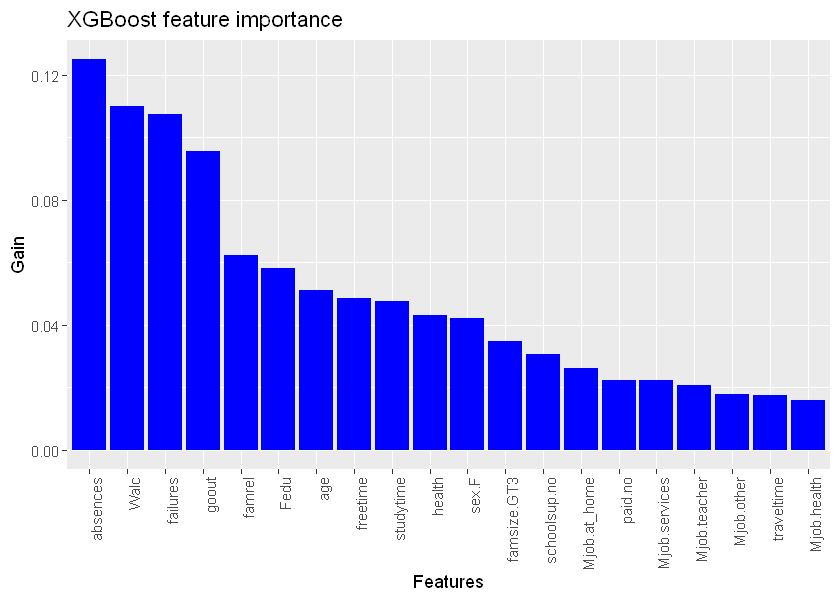

In [579]:
# get variable importance 
imp <- xgb.importance(model = xgbmodel)
imp <- as.data.frame(imp)

# inspect
head(imp)

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Gain, x = reorder(Feature, -Gain)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') +
labs(title = 'XGBoost feature importance')

In [ ]:
# remove traveltime


In [526]:
model_dataset <- student_grades %>%
select( 'absences', 'failures', 'sex',  'Mjob',  'goout', 'Walc', 'freetime', 'paid', 'Fedu', 'health', 'studytime', 
       'famsize', 'age', 'famrel', 'schoolsup', 'Pass')

In [527]:
head(model_dataset)

absences,failures,sex,Mjob,goout,Walc,freetime,paid,Fedu,health,studytime,famsize,age,famrel,schoolsup,Pass
6,0,F,at_home,4,1,3,no,4,3,2,GT3,18,4,yes,0
4,0,F,at_home,3,1,3,no,1,3,2,GT3,17,5,no,0
10,3,F,at_home,2,3,3,yes,1,3,2,LE3,15,4,yes,0
2,0,F,health,2,1,2,yes,2,5,3,GT3,15,3,no,1
4,0,F,other,2,2,3,yes,3,5,2,GT3,16,4,no,0
10,0,M,services,2,2,4,yes,3,5,2,LE3,16,5,no,1


In [528]:
str(model_dataset)

'data.frame':	390 obs. of  16 variables:
 $ absences : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex      : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob     : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout    : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime : int  3 3 3 2 3 4 4 1 2 5 ...
 $ paid     : Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 1 2 2 ...
 $ Fedu     : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health   : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime: int  2 2 2 3 2 2 2 2 2 2 ...
 $ famsize  : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ age      : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel   : int  4 5 4 3 4 5 4 4 4 5 ...
 $ schoolsup: Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ Pass     : int  0 0 0 1 0 1 1 0 1 1 ...


In [529]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
head(final_df)

sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,famsize.LE3,schoolsup.no,schoolsup.yes
1,0,1,0,0,0,0,1,0,1,0,0,1
1,0,1,0,0,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,1,0,1
1,0,0,1,0,0,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,1,0
0,1,0,0,0,1,0,0,1,0,1,1,0


In [530]:
drops <- c('sex', 'Mjob', 'paid', 'famsize', 'schoolsup')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,absences,failures,goout,Walc,freetime,Fedu,health,studytime,age,famrel,Pass
1,6,0,4,1,3,4,3,2,18,4,0
2,4,0,3,1,3,1,3,2,17,5,0
3,10,3,2,3,3,1,3,2,15,4,0
4,2,0,2,1,2,2,5,3,15,3,1
5,4,0,2,2,3,3,5,2,16,4,0
6,10,0,2,2,4,3,5,2,16,5,1
7,0,0,4,1,4,2,3,2,16,4,1
8,6,0,4,1,1,4,1,2,17,4,0
9,0,0,2,1,2,2,1,2,15,4,1
10,0,0,1,1,5,4,5,2,15,5,1


'data.frame':	390 obs. of  11 variables:
 $ absences : int  6 4 10 2 4 10 0 6 0 0 ...
 $ failures : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout    : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : int  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu     : int  4 1 1 2 3 3 2 4 2 4 ...
 $ health   : int  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime: int  2 2 2 3 2 2 2 2 2 2 ...
 $ age      : int  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel   : int  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass     : int  0 0 0 1 0 1 1 0 1 1 ...


In [531]:
str(model_dataset)

'data.frame':	390 obs. of  11 variables:
 $ absences : num  6 4 10 2 4 10 0 6 0 0 ...
 $ failures : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout    : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : num  1 1 3 1 2 2 1 1 1 1 ...
 $ freetime : num  3 3 3 2 3 4 4 1 2 5 ...
 $ Fedu     : num  4 1 1 2 3 3 2 4 2 4 ...
 $ health   : num  3 3 3 5 5 5 3 1 1 5 ...
 $ studytime: num  2 2 2 3 2 2 2 2 2 2 ...
 $ age      : num  18 17 15 15 16 16 16 17 15 15 ...
 $ famrel   : num  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass     : num  0 0 0 1 0 1 1 0 1 1 ...


In [532]:
scale_dataset <- model_dataset[, -11]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,paid.no,paid.yes,famsize.GT3,...,failures,goout,Walc,freetime,Fedu,health,studytime,age,famrel,model_dataset$Pass
1,1,0,1,0,0,0,0,1,0,1,...,0.00000000,0.13333333,0.03333333,0.10000000,0.13333333,0.10000000,0.06666667,0.6000000,0.13333333,0
2,1,0,1,0,0,0,0,1,0,1,...,0.00000000,0.10000000,0.03333333,0.10000000,0.03333333,0.10000000,0.06666667,0.5666667,0.16666667,0
3,1,0,1,0,0,0,0,0,1,0,...,0.10000000,0.06666667,0.10000000,0.10000000,0.03333333,0.10000000,0.06666667,0.5000000,0.13333333,0
4,1,0,0,1,0,0,0,0,1,1,...,0.00000000,0.06666667,0.03333333,0.06666667,0.06666667,0.16666667,0.10000000,0.5000000,0.10000000,1
5,1,0,0,0,1,0,0,0,1,1,...,0.00000000,0.06666667,0.06666667,0.10000000,0.10000000,0.16666667,0.06666667,0.5333333,0.13333333,0
6,0,1,0,0,0,1,0,0,1,0,...,0.00000000,0.06666667,0.06666667,0.13333333,0.10000000,0.16666667,0.06666667,0.5333333,0.16666667,1
7,0,1,0,0,1,0,0,1,0,0,...,0.00000000,0.13333333,0.03333333,0.13333333,0.06666667,0.10000000,0.06666667,0.5333333,0.13333333,1
8,1,0,0,0,1,0,0,1,0,1,...,0.00000000,0.13333333,0.03333333,0.03333333,0.13333333,0.03333333,0.06666667,0.5666667,0.13333333,0
9,0,1,0,0,0,1,0,0,1,0,...,0.00000000,0.06666667,0.03333333,0.06666667,0.06666667,0.03333333,0.06666667,0.5000000,0.13333333,1
10,0,1,0,0,1,0,0,0,1,1,...,0.00000000,0.03333333,0.03333333,0.16666667,0.13333333,0.16666667,0.06666667,0.5000000,0.16666667,1


In [533]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [534]:
str(model_dataset)

'data.frame':	390 obs. of  24 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ paid.no      : num  1 1 0 0 0 0 1 1 0 0 ...
 $ paid.yes     : num  0 0 1 1 1 1 0 0 1 1 ...
 $ famsize.GT3  : num  1 1 0 1 1 0 0 1 0 1 ...
 $ famsize.LE3  : num  0 0 1 0 0 1 1 0 1 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ absences     : num  0.2 0.1333 0.3333 0.0667 0.1333 ...
 $ failures     : num  0 0 0.1 0 0 0 0 0 0 0 ...
 $ goout        : num  0.1333 0.1 0.0667 0.0667 0.0667 ...
 $ Walc         : num  0.0333 0.0333 0.1 0.0333 0.0667 ...
 $ freetime     : num  0.1 0.1 0.1 0.0667 0.1 ...
 $ Fedu         : num  0.1333 0.0333 0.0333 0.0667 0.1 ...
 $ health    

In [535]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-25]
testset <- testset[-25]

In [536]:
dim(trainset)
dim(testset)

[1] 312  24

[1] 78 24

In [537]:
train_matrix <- model.matrix(Pass~., trainset)
test_matrix <- model.matrix(Pass~., testset) 

train_labels <- trainset$Pass 
train_labels

[1] 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 [38] 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 [75] 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0
[112] 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0
[149] 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
[186] 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
[223] 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0
[260] 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
[297] 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0

In [553]:
xgbmodel <- xgboost(data = train_matrix, label = train_labels,
eta = 0.3, nrounds = 40, max_depth = 30, objective ="binary:logistic", verbose=0) 

# predict on train set
xgb_prob <- predict(xgbmodel, train_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 
mean(xgb_pred==trainset$Pass)

# predict on test set
xgb_prob <- predict(xgbmodel, test_matrix, type = "response") 
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0) 

conf_matrix <- table(actual = testset$Pass, predicted = xgb_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(xgb_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = xgb_pred, cutoff = 0.5)

[13:03:26] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[1] 1

      predicted
actual  0  1
     0 31  9
     1 13 25
[1] 0.775
[1] 0.6578947
[1] 0.4363533


[1] 71.79487

[1] 0.6944444

Feature,Gain,Cover,Frequency
absences,0.12633332,0.14383095,0.16198704
failures,0.10366423,0.10474217,0.03239741
Walc,0.09984021,0.07427287,0.10259179
goout,0.08882801,0.08483581,0.07883369
famrel,0.06489312,0.06053628,0.06479482
Fedu,0.06308440,0.08331905,0.07991361


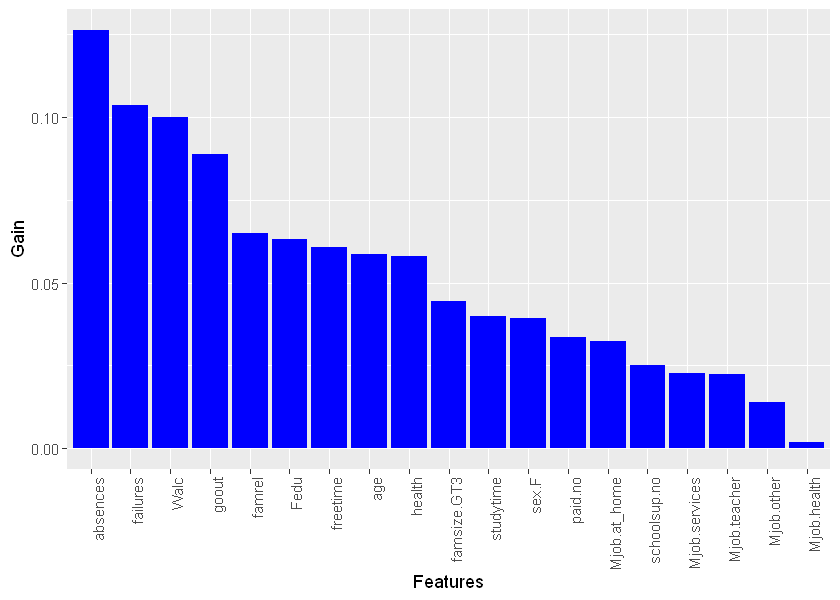

In [554]:
# get variable importance 
imp <- xgb.importance(model = xgbmodel)
imp <- as.data.frame(imp)

# inspect
head(imp)

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Gain, x = reorder(Feature, -Gain)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [ ]:
## svm linear tuning

In [239]:
model_dataset <- student_grades %>%
select('failures', 'sex',  'Mjob',  'goout', 'Walc', 'Fedu', 'studytime', 'schoolsup','nursery', 'Pstatus', 'Fjob', 
       'health', 'reason', 'Medu', 'freetime', 'Dalc', 'famrel', 'address', 'activities', 'famsize', 'guardian','Pass')

In [240]:
model_dataset

,failures,sex,Mjob,goout,Walc,Fedu,studytime,schoolsup,nursery,Pstatus,...,reason,Medu,freetime,Dalc,famrel,address,activities,famsize,guardian,Pass
1,0,F,at_home,4,1,4,2,yes,yes,A,...,course,4,3,1,4,U,no,GT3,mother,0
2,0,F,at_home,3,1,1,2,no,no,T,...,course,1,3,1,5,U,no,GT3,father,0
3,3,F,at_home,2,3,1,2,yes,yes,T,...,other,1,3,2,4,U,no,LE3,mother,0
4,0,F,health,2,1,2,3,no,yes,T,...,home,4,2,1,3,U,yes,GT3,mother,1
5,0,F,other,2,2,3,2,no,yes,T,...,home,3,3,1,4,U,no,GT3,father,0
6,0,M,services,2,2,3,2,no,yes,T,...,reputation,4,4,1,5,U,yes,LE3,mother,1
7,0,M,other,4,1,2,2,no,yes,T,...,home,2,4,1,4,U,no,LE3,mother,1
8,0,F,other,4,1,4,2,yes,yes,A,...,home,4,1,1,4,U,no,GT3,mother,0
9,0,M,services,2,1,2,2,no,yes,A,...,home,3,2,1,4,U,no,LE3,mother,1
10,0,M,other,1,1,4,2,no,yes,T,...,home,3,5,1,5,U,yes,GT3,mother,1


In [241]:
str(model_dataset)

'data.frame':	390 obs. of  22 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ nursery   : Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ health    : int  3 3 3 5 5 5 3 1 1 5 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ freetime  : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ ad

In [242]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'schoolsup', 'nursery', 'Pstatus', 'Fjob', 'reason',
                                                  'address', 'activities', 'famsize', 'guardian')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,nursery.no,...,reason.reputation,address.R,address.U,activities.no,activities.yes,famsize.GT3,famsize.LE3,guardian.father,guardian.mother,guardian.other
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0
5,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
6,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
7,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
8,1,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
9,0,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
10,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0


In [243]:
drops <- c('sex', 'Mjob', 'schoolsup', 'nursery', 'Pstatus', 'Fjob', 'reason', 'address', 'activities', 'famsize',
           'guardian')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Walc,Fedu,studytime,health,Medu,freetime,Dalc,famrel,Pass
1,0,4,1,4,2,3,4,3,1,4,0
2,0,3,1,1,2,3,1,3,1,5,0
3,3,2,3,1,2,3,1,3,2,4,0
4,0,2,1,2,3,5,4,2,1,3,1
5,0,2,2,3,2,5,3,3,1,4,0
6,0,2,2,3,2,5,4,4,1,5,1
7,0,4,1,2,2,3,2,4,1,4,1
8,0,4,1,4,2,1,4,1,1,4,0
9,0,2,1,2,2,1,3,2,1,4,1
10,0,1,1,4,2,5,3,5,1,5,1


'data.frame':	390 obs. of  11 variables:
 $ failures : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout    : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu     : int  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime: int  2 2 2 3 2 2 2 2 2 2 ...
 $ health   : int  3 3 3 5 5 5 3 1 1 5 ...
 $ Medu     : int  4 1 1 4 3 4 2 4 3 3 ...
 $ freetime : int  3 3 3 2 3 4 4 1 2 5 ...
 $ Dalc     : int  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel   : int  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass     : int  0 0 0 1 0 1 1 0 1 1 ...


In [244]:
str(model_dataset)

'data.frame':	390 obs. of  11 variables:
 $ failures : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout    : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc     : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu     : num  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime: num  2 2 2 3 2 2 2 2 2 2 ...
 $ health   : num  3 3 3 5 5 5 3 1 1 5 ...
 $ Medu     : num  4 1 1 4 3 4 2 4 3 3 ...
 $ freetime : num  3 3 3 2 3 4 4 1 2 5 ...
 $ Dalc     : num  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel   : num  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass     : num  0 0 0 1 0 1 1 0 1 1 ...


In [245]:
scale_dataset <- model_dataset[, -11]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,nursery.no,...,goout,Walc,Fedu,studytime,health,Medu,freetime,Dalc,famrel,model_dataset$Pass
1,1,0,1,0,0,0,0,0,1,0,...,0.8,0.2,0.8,0.4,0.6,0.8,0.6,0.2,0.8,0
2,1,0,1,0,0,0,0,1,0,1,...,0.6,0.2,0.2,0.4,0.6,0.2,0.6,0.2,1.0,0
3,1,0,1,0,0,0,0,0,1,0,...,0.4,0.6,0.2,0.4,0.6,0.2,0.6,0.4,0.8,0
4,1,0,0,1,0,0,0,1,0,0,...,0.4,0.2,0.4,0.6,1.0,0.8,0.4,0.2,0.6,1
5,1,0,0,0,1,0,0,1,0,0,...,0.4,0.4,0.6,0.4,1.0,0.6,0.6,0.2,0.8,0
6,0,1,0,0,0,1,0,1,0,0,...,0.4,0.4,0.6,0.4,1.0,0.8,0.8,0.2,1.0,1
7,0,1,0,0,1,0,0,1,0,0,...,0.8,0.2,0.4,0.4,0.6,0.4,0.8,0.2,0.8,1
8,1,0,0,0,1,0,0,0,1,0,...,0.8,0.2,0.8,0.4,0.2,0.8,0.2,0.2,0.8,0
9,0,1,0,0,0,1,0,1,0,0,...,0.4,0.2,0.4,0.4,0.2,0.6,0.4,0.2,0.8,1
10,0,1,0,0,1,0,0,1,0,0,...,0.2,0.2,0.8,0.4,1.0,0.6,1.0,0.2,1.0,1


In [246]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [247]:
str(model_dataset)

'data.frame':	390 obs. of  42 variables:
 $ sex.F            : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M            : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other       : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services    : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no     : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes    : num  1 0 1 0 0 0 0 1 0 0 ...
 $ nursery.no       : num  0 1 0 0 0 0 0 0 0 0 ...
 $ nursery.yes      : num  1 0 1 1 1 1 1 1 1 1 ...
 $ Pstatus.A        : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T        : num  0 1 1 1 1 1 1 0 0 1 ...
 $ Fjob.at_home     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.other       : num  0 1 1 0 1 1 1 0 1 1 ...
 $ Fjob.services    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjob.teacher     : num  1 0 0 0 0 0 0 1 0 0 ...
 $ reason.course    : num  1 1 0 0 0 0 0 

In [248]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-43]
testset <- testset[-43]

In [249]:
dim(trainset)
dim(testset)

[1] 312  42

[1] 78 42

In [250]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'linear')
print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-42])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-42])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  204



[1] 0.7371795

      predicted
actual  0  1
     0 24 16
     1  9 29
[1] 0.6
[1] 0.7631579
[1] 0.3674126


[1] 67.94872

[1] 0.6551724

In [251]:
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures             goout      Mjob.teacher     Mjob.services 
      0.919993429       0.506484299       0.416262784       0.291296871 
             Fedu     schoolsup.yes      schoolsup.no      Mjob.at_home 
      0.262226220       0.224586918       0.224586918       0.212755886 
      Fjob.health       Mjob.health              Medu              Dalc 
      0.183632164       0.181403247       0.176754564       0.148497200 
         freetime         Pstatus.T         Pstatus.A             sex.F 
      0.148336776       0.144651483       0.144651483       0.142835935 
            sex.M        nursery.no       nursery.yes      Fjob.at_home 
      0.142835935       0.139412133       0.139412133       0.132559422 
     Fjob.teacher         studytime         address.R         address.U 
      0.132291243       0.127101043       0.111175672       0.111175672 
      reason.home        Mjob.other       famsize.GT3       famsize.LE3 
      0.110588942       0.102247148       0.078937403       0.078937403 
  guardian.father              Walc reason.reputation    guardian.other 
      0.075392437       0.071091017       0.066272674       0.052227484 
           famrel            health     activities.no    activities.yes 
      0.051856264       0.050558986       0.047831464       0.047831464 
       Fjob.other   guardian.mother     reason.course      reason.other 
      0.044970217       0.038953124       0.035862084       0.009468656 
    Fjob.services 
      0.007455220

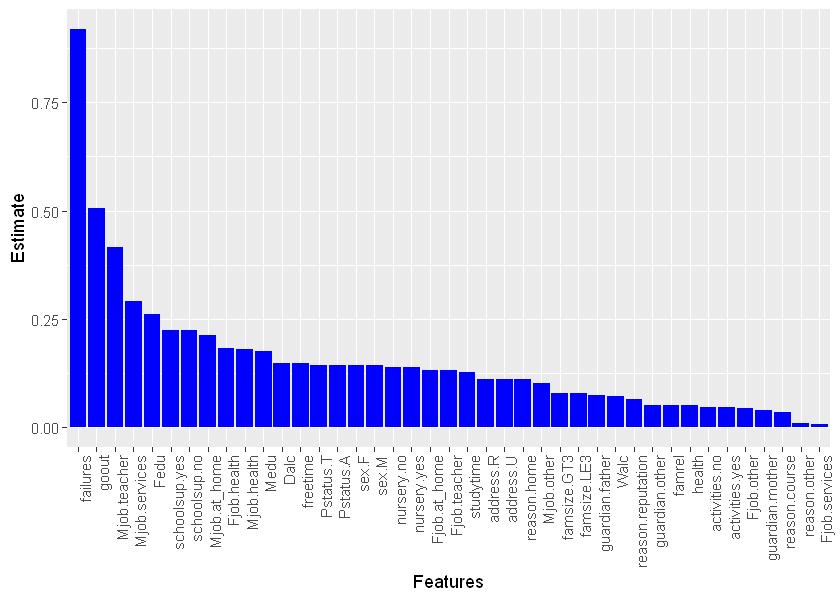

In [252]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [369]:
# remove Fjob and health and fit the model again
model_dataset <- student_grades %>%
select('failures', 'sex',  'Mjob',  'goout', 'Walc', 'Fedu', 'schoolsup','romantic', 'traveltime', 'studytime', 'Pstatus',
       'nursery', 'Pass')

In [370]:
model_dataset

,failures,sex,Mjob,goout,Walc,Fedu,schoolsup,romantic,traveltime,studytime,Pstatus,nursery,Pass
1,0,F,at_home,4,1,4,yes,no,2,2,A,yes,0
2,0,F,at_home,3,1,1,no,no,1,2,T,no,0
3,3,F,at_home,2,3,1,yes,no,1,2,T,yes,0
4,0,F,health,2,1,2,no,yes,1,3,T,yes,1
5,0,F,other,2,2,3,no,no,1,2,T,yes,0
6,0,M,services,2,2,3,no,no,1,2,T,yes,1
7,0,M,other,4,1,2,no,no,1,2,T,yes,1
8,0,F,other,4,1,4,yes,no,2,2,A,yes,0
9,0,M,services,2,1,2,no,no,1,2,A,yes,1
10,0,M,other,1,1,4,no,no,1,2,T,yes,1


In [371]:
str(model_dataset)

'data.frame':	390 obs. of  13 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ romantic  : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ nursery   : Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [372]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'schoolsup', 'Pstatus', 'romantic', 'nursery')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,Pstatus.A,Pstatus.T,romantic.no,romantic.yes,nursery.no,nursery.yes
1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1
2,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0
3,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1
4,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1
5,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1
6,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1
7,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1
8,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1
9,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
10,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1


In [373]:
drops <- c('sex', 'Mjob', 'schoolsup', 'Pstatus', 'romantic', 'nursery')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Walc,Fedu,traveltime,studytime,Pass
1,0,4,1,4,2,2,0
2,0,3,1,1,1,2,0
3,3,2,3,1,1,2,0
4,0,2,1,2,1,3,1
5,0,2,2,3,1,2,0
6,0,2,2,3,1,2,1
7,0,4,1,2,1,2,1
8,0,4,1,4,2,2,0
9,0,2,1,2,1,2,1
10,0,1,1,4,1,2,1


'data.frame':	390 obs. of  7 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [374]:
str(model_dataset)

'data.frame':	390 obs. of  7 variables:
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [375]:
scale_dataset <- model_dataset[, -7]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,Pstatus.A,...,romantic.yes,nursery.no,nursery.yes,failures,goout,Walc,Fedu,traveltime,studytime,model_dataset$Pass
1,1,0,1,0,0,0,0,0,1,1,...,0,0,1,0.0,0.8,0.2,0.8,0.4,0.4,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0.0,0.6,0.2,0.2,0.2,0.4,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0.6,0.4,0.6,0.2,0.2,0.4,0
4,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0.0,0.4,0.2,0.4,0.2,0.6,1
5,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0.0,0.4,0.4,0.6,0.2,0.4,0
6,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0.0,0.4,0.4,0.6,0.2,0.4,1
7,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0.0,0.8,0.2,0.4,0.2,0.4,1
8,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0.0,0.8,0.2,0.8,0.4,0.4,0
9,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0.0,0.4,0.2,0.4,0.2,0.4,1
10,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0.0,0.2,0.2,0.8,0.2,0.4,1


In [376]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [377]:
str(model_dataset)

'data.frame':	390 obs. of  22 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ Pstatus.A    : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T    : num  0 1 1 1 1 1 1 0 0 1 ...
 $ romantic.no  : num  1 1 1 0 1 1 1 1 1 1 ...
 $ romantic.yes : num  0 0 0 1 0 0 0 0 0 0 ...
 $ nursery.no   : num  0 1 0 0 0 0 0 0 0 0 ...
 $ nursery.yes  : num  1 0 1 1 1 1 1 1 1 1 ...
 $ failures     : num  0 0 0.6 0 0 0 0 0 0 0 ...
 $ goout        : num  0.8 0.6 0.4 0.4 0.4 0.4 0.8 0.8 0.4 0.2 ...
 $ Walc         : num  0.2 0.2 0.6 0.2 0.4 0.4 0.2 0.2 0.2 0.2 ...
 $ Fedu         : num  0.8 0.2 0.2 0.4 0.6 0.6 0.4 0.8 0.4 0.8 ...
 $ t

In [378]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-23]
testset <- testset[-23]

In [379]:
dim(trainset)
dim(testset)

[1] 312  22

[1] 78 22

In [380]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'linear')
print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-22])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-22])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  207



[1] 0.7371795

      predicted
actual  0  1
     0 27 13
     1  8 30
[1] 0.675
[1] 0.7894737
[1] 0.4667826


[1] 73.07692

[1] 0.6551724

In [381]:
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures         goout Mjob.services  Mjob.at_home  Mjob.teacher 
   0.97600307    0.34869348    0.31030959    0.30457015    0.29272965 
         Fedu          Walc  schoolsup.no schoolsup.yes   Mjob.health 
   0.28650088    0.25684057    0.21242925    0.21242925    0.18356616 
   nursery.no   nursery.yes   romantic.no  romantic.yes         sex.F 
   0.14593329    0.14593329    0.10939199    0.10939199    0.10403038 
        sex.M     Pstatus.T     Pstatus.A    Mjob.other    traveltime 
   0.10403038    0.08817541    0.08817541    0.05545259    0.04909948 
    studytime 
   0.02914184

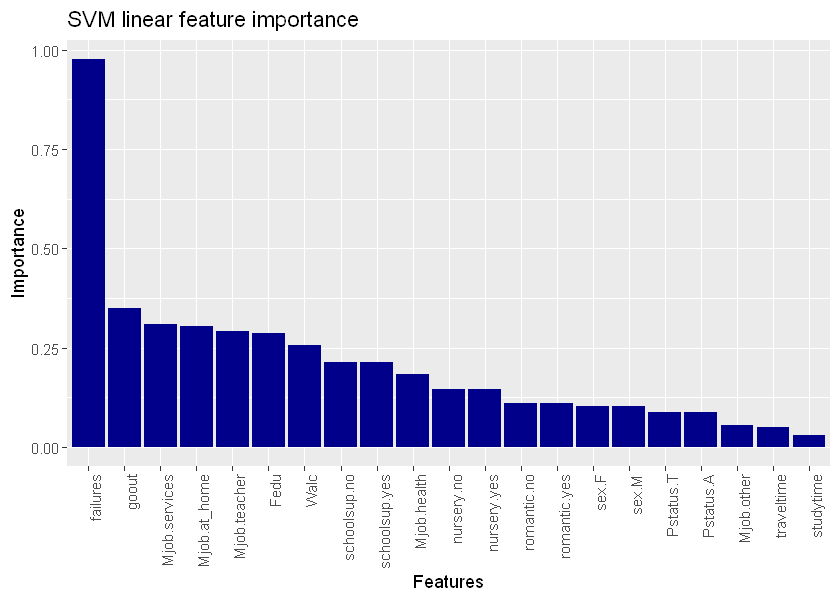

In [383]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'dark blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features') +
ylab('Importance')+
labs(title = 'SVM linear feature importance')

In [331]:
model_dataset <- student_grades %>%
select('failures', 'sex',  'Mjob',  'goout', 'Fedu', 'studytime', 'schoolsup','nursery', 'Pstatus', 'Fjob', 'traveltime',
       'Medu', 'Dalc', 'address', 'absences', 'Pass')

In [332]:
head(model_dataset)

failures,sex,Mjob,goout,Fedu,studytime,schoolsup,nursery,Pstatus,Fjob,traveltime,Medu,Dalc,address,absences,Pass
0,F,at_home,4,4,2,yes,yes,A,teacher,2,4,1,U,6,0
0,F,at_home,3,1,2,no,no,T,other,1,1,1,U,4,0
3,F,at_home,2,1,2,yes,yes,T,other,1,1,2,U,10,0
0,F,health,2,2,3,no,yes,T,services,1,4,1,U,2,1
0,F,other,2,3,2,no,yes,T,other,1,3,1,U,4,0
0,M,services,2,3,2,no,yes,T,other,1,4,1,U,10,1


In [333]:
str(model_dataset)

'data.frame':	390 obs. of  16 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ nursery   : Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [334]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('sex', 'Mjob', 'schoolsup', 'nursery', 'Pstatus', 'Fjob', 'address')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
final_df

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,nursery.no,nursery.yes,Pstatus.A,Pstatus.T,Fjob.at_home,Fjob.health,Fjob.other,Fjob.services,Fjob.teacher,address.R,address.U
1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1
2,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
5,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
6,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
8,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
10,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1


In [335]:
drops <- c('sex', 'Mjob', 'schoolsup', 'nursery', 'Pstatus', 'Fjob', 'address')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Fedu,studytime,traveltime,Medu,Dalc,absences,Pass
1,0,4,4,2,2,4,1,6,0
2,0,3,1,2,1,1,1,4,0
3,3,2,1,2,1,1,2,10,0
4,0,2,2,3,1,4,1,2,1
5,0,2,3,2,1,3,1,4,0
6,0,2,3,2,1,4,1,10,1
7,0,4,2,2,1,2,1,0,1
8,0,4,4,2,2,4,1,6,0
9,0,2,2,2,1,3,1,0,1
10,0,1,4,2,1,3,1,0,1


'data.frame':	390 obs. of  9 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ absences  : int  6 4 10 2 4 10 0 6 0 0 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [336]:
str(model_dataset)

'data.frame':	390 obs. of  9 variables:
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [337]:
scale_dataset <- model_dataset[, -9]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
model_dataset

,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,nursery.no,...,address.U,failures,goout,Fedu,studytime,traveltime,Medu,Dalc,absences,model_dataset$Pass
1,1,0,1,0,0,0,0,0,1,0,...,1,0.00000000,0.13333333,0.13333333,0.06666667,0.06666667,0.13333333,0.03333333,0.20000000,0
2,1,0,1,0,0,0,0,1,0,1,...,1,0.00000000,0.10000000,0.03333333,0.06666667,0.03333333,0.03333333,0.03333333,0.13333333,0
3,1,0,1,0,0,0,0,0,1,0,...,1,0.10000000,0.06666667,0.03333333,0.06666667,0.03333333,0.03333333,0.06666667,0.33333333,0
4,1,0,0,1,0,0,0,1,0,0,...,1,0.00000000,0.06666667,0.06666667,0.10000000,0.03333333,0.13333333,0.03333333,0.06666667,1
5,1,0,0,0,1,0,0,1,0,0,...,1,0.00000000,0.06666667,0.10000000,0.06666667,0.03333333,0.10000000,0.03333333,0.13333333,0
6,0,1,0,0,0,1,0,1,0,0,...,1,0.00000000,0.06666667,0.10000000,0.06666667,0.03333333,0.13333333,0.03333333,0.33333333,1
7,0,1,0,0,1,0,0,1,0,0,...,1,0.00000000,0.13333333,0.06666667,0.06666667,0.03333333,0.06666667,0.03333333,0.00000000,1
8,1,0,0,0,1,0,0,0,1,0,...,1,0.00000000,0.13333333,0.13333333,0.06666667,0.06666667,0.13333333,0.03333333,0.20000000,0
9,0,1,0,0,0,1,0,1,0,0,...,1,0.00000000,0.06666667,0.06666667,0.06666667,0.03333333,0.10000000,0.03333333,0.00000000,1
10,0,1,0,0,1,0,0,1,0,0,...,1,0.00000000,0.03333333,0.13333333,0.06666667,0.03333333,0.10000000,0.03333333,0.00000000,1


In [338]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [339]:
str(model_dataset)

'data.frame':	390 obs. of  29 variables:
 $ sex.F        : num  1 1 1 1 1 0 0 1 0 0 ...
 $ sex.M        : num  0 0 0 0 0 1 1 0 1 1 ...
 $ Mjob.at_home : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services: num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes: num  1 0 1 0 0 0 0 1 0 0 ...
 $ nursery.no   : num  0 1 0 0 0 0 0 0 0 0 ...
 $ nursery.yes  : num  1 0 1 1 1 1 1 1 1 1 ...
 $ Pstatus.A    : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T    : num  0 1 1 1 1 1 1 0 0 1 ...
 $ Fjob.at_home : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.other   : num  0 1 1 0 1 1 1 0 1 1 ...
 $ Fjob.services: num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjob.teacher : num  1 0 0 0 0 0 0 1 0 0 ...
 $ address.R    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ address.U    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ failures     : n

In [340]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-30]
testset <- testset[-30]

In [341]:
dim(trainset)
dim(testset)

[1] 312  29

[1] 78 29

In [342]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'linear')
print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-29])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-29])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  207



[1] 0.7564103

      predicted
actual  0  1
     0 24 16
     1  7 31
[1] 0.6
[1] 0.8157895
[1] 0.4246836


[1] 70.51282

[1] 0.6551724

In [329]:
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures         goout  Mjob.teacher Mjob.services  Mjob.at_home 
   0.98347546    0.44192444    0.37578277    0.28254562    0.24263477 
         Fedu schoolsup.yes  schoolsup.no          Medu  Fjob.at_home 
   0.23894496    0.23648562    0.23648562    0.17575510    0.17295674 
 Fjob.teacher   Fjob.health    Mjob.other          Dalc    nursery.no 
   0.16844351    0.15449336    0.13897193    0.13378883    0.13306135 
  nursery.yes   Mjob.health     Pstatus.A     Pstatus.T         sex.F 
   0.13306135    0.11472404    0.11398523    0.11398523    0.11018702 
        sex.M     address.U     address.R   famsize.GT3   famsize.LE3 
   0.11018702    0.09184526    0.09184526    0.08451363    0.08451363 
    studytime    Fjob.other Fjob.services      absences    traveltime 
   0.07532854    0.07508982    0.02866580    0.01285153    0.01120531

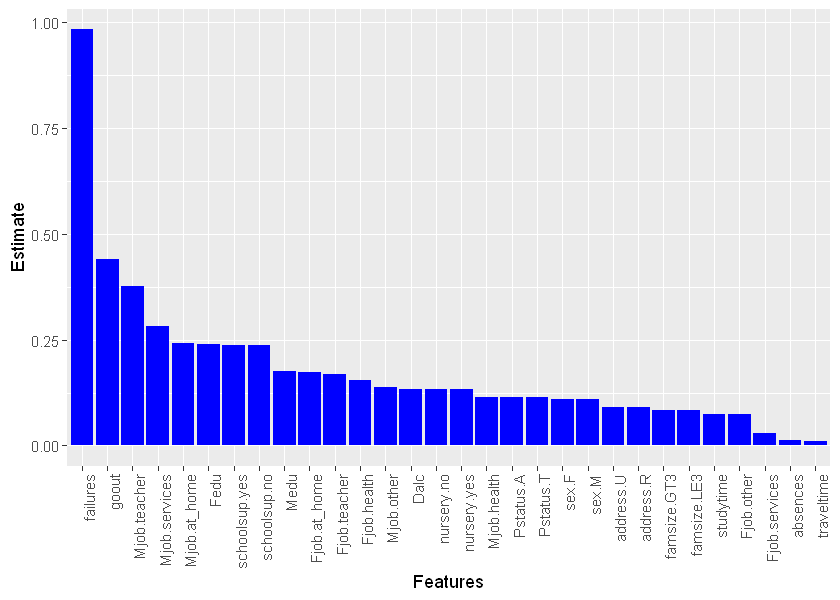

In [330]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [395]:
# tuning svm radial
model_dataset <- student_grades %>%
select('failures',  'Mjob',  'goout', 'Walc', 'Fedu', 'schoolsup','romantic', 'traveltime', 'studytime', 'Pstatus',
       'nursery', 'Medu', 'Fjob', 'Dalc', 'reason', 'famrel', 'guardian', 'address', 'school', 'higher', 'age', 'Pass')

In [396]:
# remove guardian, internet, famsup, reason, freetime, sex, paid, freetime, age,

In [397]:
head(model_dataset)

failures,Mjob,goout,Walc,Fedu,schoolsup,romantic,traveltime,studytime,Pstatus,...,Fjob,Dalc,reason,famrel,guardian,address,school,higher,age,Pass
0,at_home,4,1,4,yes,no,2,2,A,...,teacher,1,course,4,mother,U,GP,yes,18,0
0,at_home,3,1,1,no,no,1,2,T,...,other,1,course,5,father,U,GP,yes,17,0
3,at_home,2,3,1,yes,no,1,2,T,...,other,2,other,4,mother,U,GP,yes,15,0
0,health,2,1,2,no,yes,1,3,T,...,services,1,home,3,mother,U,GP,yes,15,1
0,other,2,2,3,no,no,1,2,T,...,other,1,home,4,father,U,GP,yes,16,0
0,services,2,2,3,no,no,1,2,T,...,other,1,reputation,5,mother,U,GP,yes,16,1


In [398]:
str(model_dataset)

'data.frame':	390 obs. of  22 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ romantic  : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ nursery   : Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ guardian  : Factor w/ 3 levels "father","mo

In [399]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('Mjob', 'schoolsup', 'romantic', 'Pstatus', 'nursery', 'Fjob', 'reason',
                                                 'guardian', 'address', 'school', 'higher')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
head(final_df)

Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,romantic.no,romantic.yes,Pstatus.A,...,reason.reputation,guardian.father,guardian.mother,guardian.other,address.R,address.U,school.GP,school.MS,higher.no,higher.yes
1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,1,0,0,1
0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,0,1


In [400]:
drops <- c('Mjob', 'schoolsup', 'romantic', 'Pstatus', 'nursery', 'Fjob', 'reason', 'guardian', 'address', 'school', 
           'higher')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
head(model_dataset)
str(model_dataset)
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

failures,goout,Walc,Fedu,traveltime,studytime,Medu,Dalc,famrel,age,Pass
0,4,1,4,2,2,4,1,4,18,0
0,3,1,1,1,2,1,1,5,17,0
3,2,3,1,1,2,1,2,4,15,0
0,2,1,2,1,3,4,1,3,15,1
0,2,2,3,1,2,3,1,4,16,0
0,2,2,3,1,2,4,1,5,16,1


'data.frame':	390 obs. of  11 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [401]:
str(model_dataset)

'data.frame':	390 obs. of  11 variables:
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [402]:
scale_dataset <- model_dataset[, -11]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
head(model_dataset)

Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,romantic.no,romantic.yes,Pstatus.A,...,goout,Walc,Fedu,traveltime,studytime,Medu,Dalc,famrel,age,model_dataset$Pass
1,0,0,0,0,0,1,1,0,1,...,0.18181818,0.04545455,0.18181818,0.09090909,0.09090909,0.18181818,0.04545455,0.1818182,0.8181818,0
1,0,0,0,0,1,0,1,0,0,...,0.13636364,0.04545455,0.04545455,0.04545455,0.09090909,0.04545455,0.04545455,0.2272727,0.7727273,0
1,0,0,0,0,0,1,1,0,0,...,0.09090909,0.13636364,0.04545455,0.04545455,0.09090909,0.04545455,0.09090909,0.1818182,0.6818182,0
0,1,0,0,0,1,0,0,1,0,...,0.09090909,0.04545455,0.09090909,0.04545455,0.13636364,0.18181818,0.04545455,0.1363636,0.6818182,1
0,0,1,0,0,1,0,1,0,0,...,0.09090909,0.09090909,0.13636364,0.04545455,0.09090909,0.13636364,0.04545455,0.1818182,0.7272727,0
0,0,0,1,0,1,0,1,0,0,...,0.09090909,0.09090909,0.13636364,0.04545455,0.09090909,0.18181818,0.04545455,0.2272727,0.7272727,1


In [403]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'

In [404]:
str(model_dataset)

'data.frame':	390 obs. of  42 variables:
 $ Mjob.at_home     : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other       : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services    : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no     : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes    : num  1 0 1 0 0 0 0 1 0 0 ...
 $ romantic.no      : num  1 1 1 0 1 1 1 1 1 1 ...
 $ romantic.yes     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Pstatus.A        : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T        : num  0 1 1 1 1 1 1 0 0 1 ...
 $ nursery.no       : num  0 1 0 0 0 0 0 0 0 0 ...
 $ nursery.yes      : num  1 0 1 1 1 1 1 1 1 1 ...
 $ Fjob.at_home     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.other       : num  0 1 1 0 1 1 1 0 1 1 ...
 $ Fjob.services    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjob.teacher     : num  1 0 0 0 0 0 0 1 0 0 ...
 $ reason.course    : num  1 1 0 0 0 0 0 

In [405]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-43]
testset <- testset[-43]

In [406]:
dim(trainset)
dim(testset)

[1] 312  42

[1] 78 42

In [407]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'radial')

print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-42])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-42])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  275



[1] 0.8653846

      predicted
actual  0  1
     0 24 16
     1 12 26
[1] 0.6
[1] 0.6842105
[1] 0.2849614


[1] 64.10256

[1] 0.6551724

In [408]:
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures             goout      schoolsup.no     schoolsup.yes 
      37.40301446       24.16879467       18.32262268       18.32262268 
             Fedu              Walc        nursery.no       nursery.yes 
      14.36356747       14.16661564       11.25883950       11.25883950 
      romantic.no      romantic.yes         Pstatus.T         Pstatus.A 
      10.95159098       10.95159098       10.89803257       10.89803257 
     Fjob.teacher         higher.no        higher.yes              Dalc 
      10.59117373        8.40005053        8.40005053        7.78906810 
   guardian.other              Medu     Fjob.services       Mjob.health 
       7.76171078        7.66341942        7.10453749        6.98831867 
        studytime      Mjob.teacher        traveltime               age 
       6.85431884        6.07110551        5.41032795        5.28095280 
      Fjob.health      reason.other   guardian.father      Mjob.at_home 
       5.17700123        5.11945003        4.73881461        4.68065378 
       Mjob.other      Fjob.at_home       reason.home            famrel 
       4.28060234        4.17270519        4.07902510        3.93824482 
        address.U         address.R     reason.course         school.MS 
       2.78939686        2.78939686        2.32060622        2.14310531 
        school.GP reason.reputation        Fjob.other     Mjob.services 
       2.14310531        1.99460577        1.00067423        0.34982232 
  guardian.mother 
       0.09102858

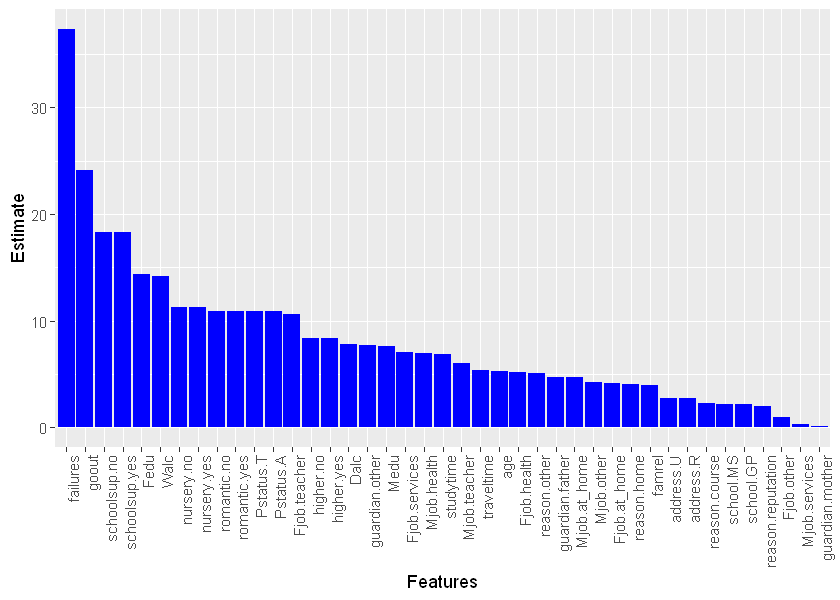

In [409]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [ ]:
# remove reason, school, address

In [410]:
# tuning svm radial
model_dataset <- student_grades %>%
select('failures',  'Mjob',  'goout', 'Walc', 'Fedu', 'schoolsup','romantic', 'traveltime', 'studytime', 'Pstatus',
       'nursery', 'Medu', 'Dalc', 'famrel', 'guardian', 'Fjob', 'Pass')

In [411]:
head(model_dataset)

failures,Mjob,goout,Walc,Fedu,schoolsup,romantic,traveltime,studytime,Pstatus,nursery,Medu,Dalc,famrel,guardian,Fjob,Pass
0,at_home,4,1,4,yes,no,2,2,A,yes,4,1,4,mother,teacher,0
0,at_home,3,1,1,no,no,1,2,T,no,1,1,5,father,other,0
3,at_home,2,3,1,yes,no,1,2,T,yes,1,2,4,mother,other,0
0,health,2,1,2,no,yes,1,3,T,yes,4,1,3,mother,services,1
0,other,2,2,3,no,no,1,2,T,yes,3,1,4,father,other,0
0,services,2,2,3,no,no,1,2,T,yes,4,1,5,mother,other,1


In [412]:
str(model_dataset)

'data.frame':	390 obs. of  17 variables:
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ goout     : int  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : int  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ schoolsup : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ romantic  : Factor w/ 2 levels "no","yes": 1 1 1 2 1 1 1 1 1 1 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ nursery   : Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : int  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : int  4 5 4 3 4 5 4 4 4 5 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ Pass      : int  0 0 0 1 0 1 1 0 1 1 ...


In [413]:
#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=model_dataset[, c('Mjob', 'schoolsup', 'romantic', 'Pstatus', 'nursery', 
                                                 'guardian', 'Fjob')])

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=model_dataset))

#view final data frame
head(final_df)

Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,romantic.no,romantic.yes,Pstatus.A,...,nursery.no,nursery.yes,guardian.father,guardian.mother,guardian.other,Fjob.at_home,Fjob.health,Fjob.other,Fjob.services,Fjob.teacher
1,0,0,0,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
0,0,1,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [414]:
drops <- c('Mjob', 'schoolsup', 'romantic', 'Pstatus', 'nursery', 'guardian', 'Fjob')
model_dataset <- model_dataset[ , !(names(model_dataset) %in% drops)]
model_dataset
model_dataset <- as.data.frame(sapply(model_dataset, as.numeric))

,failures,goout,Walc,Fedu,traveltime,studytime,Medu,Dalc,famrel,Pass
1,0,4,1,4,2,2,4,1,4,0
2,0,3,1,1,1,2,1,1,5,0
3,3,2,3,1,1,2,1,2,4,0
4,0,2,1,2,1,3,4,1,3,1
5,0,2,2,3,1,2,3,1,4,0
6,0,2,2,3,1,2,4,1,5,1
7,0,4,1,2,1,2,2,1,4,1
8,0,4,1,4,2,2,4,1,4,0
9,0,2,1,2,1,2,3,1,4,1
10,0,1,1,4,1,2,3,1,5,1


In [415]:
str(model_dataset)

'data.frame':	390 obs. of  10 variables:
 $ failures  : num  0 0 3 0 0 0 0 0 0 0 ...
 $ goout     : num  4 3 2 2 2 2 4 4 2 1 ...
 $ Walc      : num  1 1 3 1 2 2 1 1 1 1 ...
 $ Fedu      : num  4 1 1 2 3 3 2 4 2 4 ...
 $ traveltime: num  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : num  2 2 2 3 2 2 2 2 2 2 ...
 $ Medu      : num  4 1 1 4 3 4 2 4 3 3 ...
 $ Dalc      : num  1 1 2 1 1 1 1 1 1 1 ...
 $ famrel    : num  4 5 4 3 4 5 4 4 4 5 ...
 $ Pass      : num  0 0 0 1 0 1 1 0 1 1 ...


In [416]:
scale_dataset <- model_dataset[, -10]
rs_function <- function(x){(x-min(x))/(max(x)-min(x))}
scale_dataset <- rs_function(scale_dataset)

model_dataset <- cbind(final_df, scale_dataset, model_dataset$Pass)
head(model_dataset)

Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,schoolsup.no,schoolsup.yes,romantic.no,romantic.yes,Pstatus.A,...,failures,goout,Walc,Fedu,traveltime,studytime,Medu,Dalc,famrel,model_dataset$Pass
1,0,0,0,0,0,1,1,0,1,...,0.0,0.8,0.2,0.8,0.4,0.4,0.8,0.2,0.8,0
1,0,0,0,0,1,0,1,0,0,...,0.0,0.6,0.2,0.2,0.2,0.4,0.2,0.2,1.0,0
1,0,0,0,0,0,1,1,0,0,...,0.6,0.4,0.6,0.2,0.2,0.4,0.2,0.4,0.8,0
0,1,0,0,0,1,0,0,1,0,...,0.0,0.4,0.2,0.4,0.2,0.6,0.8,0.2,0.6,1
0,0,1,0,0,1,0,1,0,0,...,0.0,0.4,0.4,0.6,0.2,0.4,0.6,0.2,0.8,0
0,0,0,1,0,1,0,1,0,0,...,0.0,0.4,0.4,0.6,0.2,0.4,0.8,0.2,1.0,1


In [417]:
names(model_dataset)[names(model_dataset) == 'model_dataset$Pass'] <- 'Pass'
str(model_dataset)

'data.frame':	390 obs. of  31 variables:
 $ Mjob.at_home   : num  1 1 1 0 0 0 0 0 0 0 ...
 $ Mjob.health    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjob.other     : num  0 0 0 0 1 0 1 1 0 1 ...
 $ Mjob.services  : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Mjob.teacher   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup.no   : num  0 1 0 1 1 1 1 0 1 1 ...
 $ schoolsup.yes  : num  1 0 1 0 0 0 0 1 0 0 ...
 $ romantic.no    : num  1 1 1 0 1 1 1 1 1 1 ...
 $ romantic.yes   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Pstatus.A      : num  1 0 0 0 0 0 0 1 1 0 ...
 $ Pstatus.T      : num  0 1 1 1 1 1 1 0 0 1 ...
 $ nursery.no     : num  0 1 0 0 0 0 0 0 0 0 ...
 $ nursery.yes    : num  1 0 1 1 1 1 1 1 1 1 ...
 $ guardian.father: num  0 1 0 0 1 0 0 0 0 0 ...
 $ guardian.mother: num  1 0 1 1 0 1 1 1 1 1 ...
 $ guardian.other : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.at_home   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.health    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fjob.other     : num  0 1 1 0 1 1 1 0 1 1 ...
 $ Fjob.services  : num  0 0

In [418]:
# split into train and test sets
set.seed(42)
model_dataset[,"train"] <- ifelse(runif(nrow(model_dataset))<0.8, 1, 0)
trainset <- model_dataset[model_dataset$train == "1",]
testset <- model_dataset[model_dataset$train == "0",]
trainset <- trainset[-32]
testset <- testset[-32]

In [419]:
dim(trainset)
dim(testset)

[1] 312  31

[1] 78 31

In [420]:
# fitting svm
classifier = svm(formula = Pass ~ .,
                 data = trainset,
                 type = 'C-classification',
                 kernel = 'radial')

print(classifier)

# predict on trainset
y_pred = predict(classifier, newdata = trainset[-31])
mean(y_pred==trainset$Pass)


# Predicting the Test set results
y_pred = predict(classifier, newdata = testset[-31])

conf_matrix <- table(actual = testset$Pass, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)


Call:
svm(formula = Pass ~ ., data = trainset, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  268



[1] 0.8461538

      predicted
actual  0  1
     0 22 18
     1  9 29
[1] 0.55
[1] 0.7631579
[1] 0.3198566


[1] 65.38462

[1] 0.6551724

In [421]:
imp <- t(classifier$coefs) %*% classifier$SV     # weight vectors
imp <- apply(imp, 2, function(v){sqrt(sum(v^2))})  # weight
imp <- sort(imp, decreasing = T)
imp

failures           goout    schoolsup.no   schoolsup.yes            Walc 
     34.9447247      19.7991035      16.5045692      16.5045692      13.0790296 
           Fedu    romantic.yes     romantic.no      traveltime     nursery.yes 
     12.1209121       9.8123825       9.8123825       9.4054568       8.9306997 
     nursery.no            Dalc       Pstatus.A       Pstatus.T    Mjob.teacher 
      8.9306997       8.8093967       7.4971338       7.4971338       7.2620208 
   Fjob.teacher   Fjob.services     Fjob.health            Medu  guardian.other 
      6.9241851       5.9162716       5.4447066       5.1400839       4.8165724 
     Mjob.other       studytime     Mjob.health    Fjob.at_home guardian.father 
      4.4350767       4.2517756       3.5500100       3.2402795       2.7999849 
         famrel    Mjob.at_home      Fjob.other   Mjob.services guardian.mother 
      2.7441244       2.4704523       2.4263706       0.9170840       0.1844577

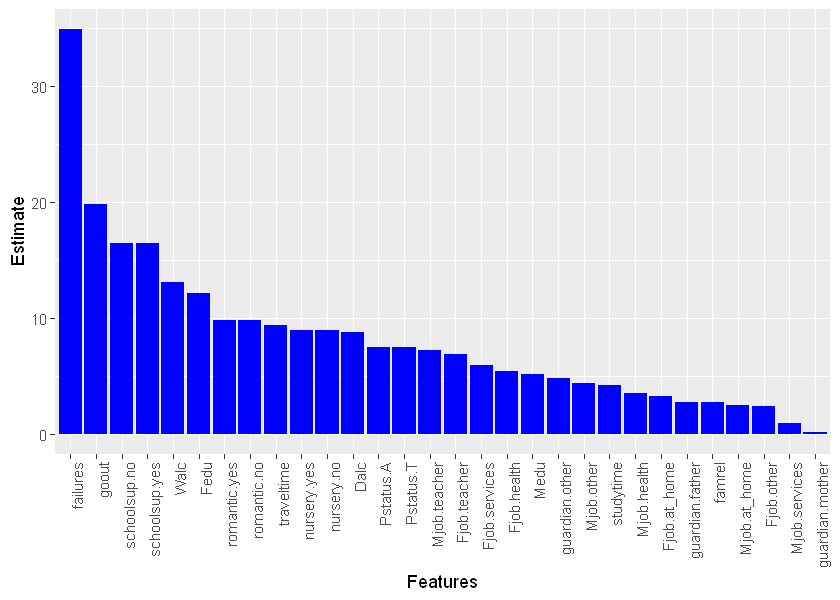

In [422]:
copy_imp <- imp
copy_imp <- as.data.frame(copy_imp) # change to a dataframe 
copy_imp$features <- row.names(copy_imp) # add row names as a column
imp <- copy_imp
colnames(imp) <- c('Estimate', 'features')

#plot
# use re-order on the x axis
ggplot(imp, aes(y = Estimate, x = reorder(features, -Estimate)))+
geom_col(fill = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
xlab('Features')

In [ ]:
# no point tuning svm polynomial

In [ ]:
# fit logistic regression model

In [64]:
trainset$Pass <- as.factor(trainset$Pass)
testset$Pass <- as.factor(testset$Pass)
str(trainset)

head(trainset)

'data.frame':	311 obs. of  17 variables:
 $ sex.F        : num  1 1 0 0 1 0 0 1 1 0 ...
 $ sex.M        : num  0 0 1 1 0 1 1 0 0 1 ...
 $ Mjob.at_home : num  1 0 0 0 0 0 0 0 0 0 ...
 $ Mjob.health  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Mjob.other   : num  0 1 0 1 1 0 1 0 0 0 ...
 $ Mjob.services: num  0 0 1 0 0 1 0 0 1 0 ...
 $ Mjob.teacher : num  0 0 0 0 0 0 0 1 0 1 ...
 $ age          : num  0.5 0.533 0.533 0.533 0.567 ...
 $ absences     : num  0.333 0.133 0.333 0 0.2 ...
 $ failures     : num  0.1 0 0 0 0 0 0 0 0 0 ...
 $ Medu         : num  0.0333 0.1 0.1333 0.0667 0.1333 ...
 $ Fedu         : num  0.0333 0.1 0.1 0.0667 0.1333 ...
 $ studytime    : num  0.0667 0.0667 0.0667 0.0667 0.0667 ...
 $ goout        : num  0.0667 0.0667 0.0667 0.1333 0.1333 ...
 $ Walc         : num  0.1 0.0667 0.0667 0.0333 0.0333 ...
 $ Dalc         : num  0.0667 0.0333 0.0333 0.0333 0.0333 ...
 $ Pass         : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 1 2 2 ...


,sex.F,sex.M,Mjob.at_home,Mjob.health,Mjob.other,Mjob.services,Mjob.teacher,age,absences,failures,Medu,Fedu,studytime,goout,Walc,Dalc,Pass
3,1,0,1,0,0,0,0,0.5000000,0.3333333,0.1,0.03333333,0.03333333,0.06666667,0.06666667,0.10000000,0.06666667,0
5,1,0,0,0,1,0,0,0.5333333,0.1333333,0.0,0.10000000,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0
6,0,1,0,0,0,1,0,0.5333333,0.3333333,0.0,0.13333333,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,1
7,0,1,0,0,1,0,0,0.5333333,0.0000000,0.0,0.06666667,0.06666667,0.06666667,0.13333333,0.03333333,0.03333333,1
8,1,0,0,0,1,0,0,0.5666667,0.2000000,0.0,0.13333333,0.13333333,0.06666667,0.13333333,0.03333333,0.03333333,0
9,0,1,0,0,0,1,0,0.5000000,0.0000000,0.0,0.10000000,0.06666667,0.06666667,0.06666667,0.03333333,0.03333333,1


In [65]:
# Fitting Logistic Regression to the Training set

test_labels <- testset$Pass
classifier = glm(formula = Pass ~ .,
                 family = binomial,
                 data = trainset)

prob_pred = predict(classifier, type = 'response', newdata = testset[, -17])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [66]:
conf_matrix <- table(test_labels, predicted = y_pred)
tp <- conf_matrix[1,1]
fn <- conf_matrix[1,2]
fp <- conf_matrix[2,1]
tn <- conf_matrix[2,2]

sensitivity <- tp/(fn+tp)
specificity <- tn/(tn+fp)
mcc <- ((tp*tn) - (fp*fn))/(sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print(conf_matrix)
print(sensitivity)
print(specificity)
print(mcc)
mean(y_pred==testset$Pass)*100
f1Score(actual=testset$Pass, predicted = y_pred, cutoff = 0.5)

           predicted
test_labels  0  1
          0 22 19
          1  8 29
[1] 0.5365854
[1] 0.7837838
[1] 0.328823


[1] 65.38462

[1] 0.6333333

In [68]:
summary(classifier)


Call:
glm(formula = Pass ~ ., family = binomial, data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0666  -1.0344   0.5457   0.9612   2.2822  

Coefficients: (2 not defined because of singularities)
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.31824    2.03161  -0.157  0.87553    
sex.F          -0.56715    0.28371  -1.999  0.04560 *  
sex.M                NA         NA      NA       NA    
Mjob.at_home    0.29316    0.57380   0.511  0.60941    
Mjob.health     1.62678    0.57127   2.848  0.00440 ** 
Mjob.other      0.95456    0.44478   2.146  0.03186 *  
Mjob.services   1.46616    0.45984   3.188  0.00143 ** 
Mjob.teacher         NA         NA      NA       NA    
age             0.95821    3.37929   0.284  0.77675    
absences       -0.01800    0.69526  -0.026  0.97935    
failures      -35.31420    8.14319  -4.337 1.45e-05 ***
Medu            4.14638    5.85765   0.708  0.47903    
Fedu            6.13867    4.68000 

In [70]:
summary_log <- summary(classifier)

In [71]:
summary_log$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.31823620,2.0316124,-0.15664218,8.755269e-01
sex.F,-0.56714939,0.2837107,-1.99904128,4.560389e-02
Mjob.at_home,0.29316366,0.5738023,0.51091405,6.094112e-01
Mjob.health,1.62677683,0.5712730,2.84763455,4.404547e-03
Mjob.other,0.95455763,0.4447811,2.14612885,3.186270e-02
Mjob.services,1.46616334,0.4598409,3.18841447,1.430553e-03
age,0.95821072,3.3792944,0.28355349,7.767526e-01
absences,-0.01799552,0.6952596,-0.02588316,9.793505e-01
failures,-35.31419509,8.1431902,-4.33665360,1.446683e-05
Medu,4.14638034,5.8576538,0.70785685,4.790342e-01


#### model evaluations

In [40]:
# TP, TN, Accuracy, Specificity, Sensitivity, AUC, MCC

In [41]:
# CHECK WEEK 10 CODES

#### enhancing our model

In [42]:
# drop some columns, feature selection

In [43]:
# fit the models

In [44]:
# evaluate the models

#### conclusion

#### learning outcomes

1. The model is heavily imbalanced as some variables have classes with big disparity in composition.

References

N. Alalwan, W. M. Al-Rahmi, O. Alfarraj, A. Alzahrani, N. Yahaya and A. M. Al-Rahmi, "Integrated Three Theories to Develop a Model of Factors Affecting Students’ Academic Performance in Higher Education," 
in IEEE Access, vol. 7, pp. 98725-98742, 2019, doi: 10.1109/ACCESS.2019.2928142.

Michaela C. Pascoe, Sarah E. Hetrick & Alexandra G. Parker (2020) The impact of stress on students in secondary school and higher education, International Journal of Adolescence and Youth, 25:1, 104-112, 
DOI: 10.1080/02673843.2019.1596823